# Задача прогноза оттока клиентов для оператора связи «ТелеДом»<br/>


***
### Задача:

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» необходима модель, которая будет предсказывать, разорвёт ли абонент договор. 

В нашем распоряжении данные, собранные командой оператора (персональные данные о некоторых клиентах, информация об их тарифах и услугах). Необходимо обучить на этих данных модель для прогноза оттока клиентов.



### Описание услуг:

Оператор предоставляет два основных типа услуг: 
* Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно;
* Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
* Выделенная линия технической поддержки (TechSupport);
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
  
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.).

### Описание данных:
    
Данные состоят из 4 файлов, полученных из разных источников:
* `contract_new.csv` — информация о договоре;
* `personal_new.csv` — персональные данные клиента;
* `internet_new.csv` — информация об интернет-услугах;
* `phone_new.csv` — информация об услугах телефонии.


Данные в файле `contract_new.csv`:
* customerID — идентификатор абонента;
* BeginDate — дата начала действия договора;
* EndDate — дата окончания действия договора (если проставлена дата, значит клиент ушел, если значение NO - остался);
* Type — тип оплаты: раз в год-два или ежемесячно;
* PaperlessBilling — электронный расчётный лист;
* PaymentMethod — тип платежа;
* MonthlyCharges — расходы за месяц;
* TotalCharges — общие расходы абонента.

Данные в файле `personal_new.csv`:
* customerID — идентификатор пользователя;
* gender — пол;
* SeniorCitizen — является ли абонент пенсионером;
* Partner — есть ли у абонента супруг или супруга;
* Dependents — есть ли у абонента дети.

Данные в файле `internet_new.csv`:
* customerID — идентификатор пользователя;
* InternetService — тип подключения;
* OnlineSecurity — блокировка опасных сайтов;
* OnlineBackup — облачное хранилище файлов для резервного копирования данных;
* DeviceProtection — антивирус;
* TechSupport — выделенная линия технической поддержки;
* StreamingTV — стриминговое телевидение;
* StreamingMovies — каталог фильмов.

Данные в файле `phone_new.csv`:
* customerID — идентификатор пользователя;
* MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента.

**Информация о договорах актуальна на 1 февраля 2020 года.**

### Цель:
* Проанализировать имеющиеся данные и взаимосвязи между ними;
* Выделить  и обработать важные для моделирования признаки;
* Попробовать несколько моделей бинарной классификации для предсказания разорвёт ли абонент договор и выбрать наилучшую.
* Передать наилучшую модель и рекомендации заказчику.

<a id='section_0'></a>
### План работы:

**[Шаг 1.](#section_1)** Загрузка, исследовательский анализ данных и предобработка.

**[Шаг 2.](#section_2)** Объединение данных.

**[Шаг 3.](#section_3)** Исследовательский анализ и предобработка объединенных данных.

**[Шаг 4.](#section_4)** Подготовка данных к обучению.

**[Шаг 5.](#section_5)** Обучение моделей машинного обучения и выбор лучшей модели.

**[Шаг 6.](#section_6)** Тестирование выбранной модели.

**[Шаг 7.](#section_7)** Общий вывод и рекомендации заказчику.


<a id='section_1'></a>
### Шаг 1. Загрузка, исследовательский анализ данных и предобработка.

Исследовательский анализ каждого датафрейма и при выполнение необходимой предобработки. Формирование выводов об имеющихся признаках: понадобятся ли они для обучения моделей.

#### 1.1 Загрузка библиотек и данных

In [1]:
# Установка библиотек
!pip install phik
!pip install shap

Active code page: 65001
Active code page: 65001


In [2]:
# Загрузка необходимых библиотек:
import pandas as pd
import time
import numpy as np
import phik
import shap
import matplotlib.pyplot as plt
import lightgbm as lgb

from numpy import mean
from phik.report import plot_correlation_matrix
from matplotlib.colors import LinearSegmentedColormap

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer

from lightgbm import LGBMClassifier

from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    confusion_matrix)

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler)

from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_predict,
    GridSearchCV,
    RepeatedStratifiedKFold)

#необходимые глобальные значения
RANDOM_STATE = 290124

In [3]:
# Загружаем данные
contract_new = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/14/contract_new.csv')
personal_new = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/14/personal_new.csv')
internet_new = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/14/internet_new.csv')
phone_new = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/14/phone_new.csv')

#### 1.1 Общий обзор и предобработка датафрейма, содержащего информацию о договорах `contract_new`:

In [4]:
# Общая информация по датафрейму 
# и несколько строк
contract_new.info()
print (display(contract_new.sample(8)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6905,4459-BBGHE,2017-08-01,No,Month-to-month,Yes,Electronic check,44.50,1441.8
5346,0771-CHWSK,2014-08-01,No,Two year,Yes,Credit card (automatic),74.60,5071.31
203,7018-WBJNK,2019-01-01,No,Month-to-month,Yes,Credit card (automatic),78.30,1017.9
4059,3415-TAILE,2019-11-01,No,Month-to-month,No,Mailed check,65.70,210.9
5613,3913-FCUUW,2014-02-01,2019-12-01,Two year,Yes,Bank transfer (automatic),70.45,4931.5
2982,5266-PFRQK,2015-10-01,No,One year,Yes,Credit card (automatic),20.85,1084.2
199,3645-DEYGF,2020-01-01,No,Month-to-month,No,Mailed check,20.75,22.0
6271,6726-WEXXK,2017-11-01,No,One year,Yes,Electronic check,85.90,2365.69


None


* Датафрейм `contract_new` содержит данные о 7043 договорах.
* Названия признаков необходимо привести к стилю snake_case.
* Пропусков в данных нет.
* Признак BeginDate по идее должен быть типа datetime.
* Признак EndDate позволит нам создать целевой признак. Необходимо будет на основе его создать бинарный признак (0 - клиент остался, 1 - клиент ушел). Также интересно на основе "end_date" посчитать длительность пребывания клиента в компании.
* TotalCharges необходимо привести к числовому типу float. 

Посмотрим еще есть ли дубликаты в датафрейме:

In [5]:
# Поиск дубликатов по всему датафрейму
contract_new.duplicated().sum()

0

Дубликатов в датафрейме нет.

Начнем предобработку. Приводим названия признаков к snake_case:

In [6]:
contract_new.rename(columns={
    'customerID': 'customer_id', 				
    'BeginDate': 'begin_date',
    'EndDate': 'end_date',
    'Type': 'type',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges'
}, inplace=True)

# Проверяем
contract_new.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

Приведем признак BeginDate к типу datetime:

In [7]:
#Изменяем тип
contract_new['begin_date'] = pd.to_datetime(
    contract_new['begin_date'], format = '%Y-%m-%d')

Приведем признак end_date к типу datetime чтобы сформировать новый признак - сколько месяцев клиент находится в компании. Для этого у неушедших клиентов значение `No` заменим на дату  2020-02-01.
На всякий случай проверим нет ли клиентов, ушедших 2 февраля)

In [8]:
contract_new.query('end_date == "2020-02-01"')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges


Хорошо, таких клиентов нет. 

In [9]:
# Заполняем значения No
contract_new.loc[contract_new['end_date'] == "No",['end_date']] = "2020-02-01"

# Изменяем тип
contract_new['end_date'] = pd.to_datetime(
    contract_new['end_date'], format = '%Y-%m-%d')

Теперь добавляем новый признак `months_spent_in_company`:

In [10]:
contract_new['months_spent_in_company'] = (contract_new['end_date'] - contract_new['begin_date'])/ np.timedelta64(1, 'M')

# Проверим
contract_new.sample(8)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,months_spent_in_company
3785,8337-UPOAQ,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,89.80,1027.31,11.072096
5066,7191-ADRGF,2016-06-01,2020-02-01,Two year,No,Bank transfer (automatic),54.30,2389.2,44.025545
1501,5014-GSOUQ,2019-01-01,2020-02-01,Two year,No,Mailed check,19.95,277.5,13.010534
1957,5619-PTMIK,2016-04-01,2019-06-01,Month-to-month,No,Electronic check,53.10,2017.8,37.980246
5668,0147-ESWWR,2016-11-01,2020-02-01,Month-to-month,Yes,Electronic check,101.25,4067.21,38.998747
4830,0536-ESJEP,2015-08-01,2020-02-01,Two year,Yes,Bank transfer (automatic),74.55,4025.7,54.046284
6891,7853-OETYL,2019-10-01,2020-02-01,Month-to-month,Yes,Electronic check,29.05,116.2,4.041151
5644,9444-JTXHZ,2019-09-01,2020-02-01,Month-to-month,No,Electronic check,76.20,419.1,5.026797


При попытке привести TotalCharges к числовому типу float обнаружилось что есть объекты с пробелами в этом признаке:

In [11]:
contract_new.query('total_charges == " "')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,months_spent_in_company
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0.0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0.0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0.0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0.0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0.0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0.0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0.0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0.0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0.0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0.0


Вот тут как раз и пригодится новоиспеченный признак months_spent_in_company, с помощью которого восстановим эти пробелы:

In [12]:
# Заполняем пробелы
contract_new.loc[contract_new['total_charges'] == " ",['total_charges']] = \
contract_new['months_spent_in_company'] * contract_new['monthly_charges']

# Приводим к вещественному типу:
contract_new['total_charges']=contract_new['total_charges'].astype(float)

# Проверяем 
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   begin_date               7043 non-null   datetime64[ns]
 2   end_date                 7043 non-null   datetime64[ns]
 3   type                     7043 non-null   object        
 4   paperless_billing        7043 non-null   object        
 5   payment_method           7043 non-null   object        
 6   monthly_charges          7043 non-null   float64       
 7   total_charges            7043 non-null   float64       
 8   months_spent_in_company  7043 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 495.3+ KB


Отлично, теперь на основе end_date создадим целевой признак client_loss (0 - клиент остался, 1 - клиент ушел):

In [13]:
contract_new['client_loss'] = contract_new['end_date'] .dt.strftime('%Y-%m-%d')
contract_new.loc[contract_new['client_loss'] != "2020-02-01",['client_loss']] = 1
contract_new.loc[contract_new['client_loss'] == "2020-02-01",['client_loss']] = 0
contract_new['client_loss'] = contract_new['client_loss'].astype('int8')

# Проверим
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   begin_date               7043 non-null   datetime64[ns]
 2   end_date                 7043 non-null   datetime64[ns]
 3   type                     7043 non-null   object        
 4   paperless_billing        7043 non-null   object        
 5   payment_method           7043 non-null   object        
 6   monthly_charges          7043 non-null   float64       
 7   total_charges            7043 non-null   float64       
 8   months_spent_in_company  7043 non-null   float64       
 9   client_loss              7043 non-null   int8          
dtypes: datetime64[ns](2), float64(3), int8(1), object(4)
memory usage: 502.2+ KB


**Промежуточный итог**
* Датафрейм `contract_new` содержит данные о 7043 договорах.
* Пропусков и дубликатов в данных нет.
* Названия признаков были приведены к стилю snape_case.
* Признаки begin_date и end_date были приведены к типу datetime (в признаке end_date для этого у неушедших клиентов значение No было заменено на дату 2020-02-01)
* Признак total_charges был приведен к числовому типу float.
* В датафрейм был добавлен новый признак months_spent_in_company хранящий инфмацию о том, сколько месяцев клиент находится в компании.
* В датафрейм на основе признака end_date был добавлен целевой признак client_loss (0 - клиент остался, 1 - клиент ушел).

#### 1.2 Анализ датафрейма, содержащего информацию о договорах `contract_new`:

Теперь приступим к анализу. Для начала посмотрим гистограмму ухода клиентов:

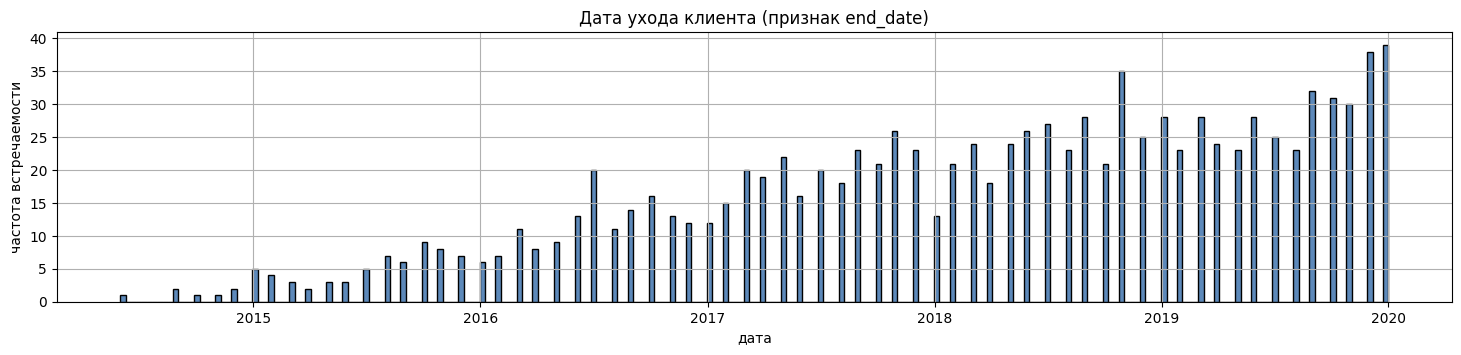

In [14]:
contract_new.loc[contract_new['end_date'] != "2020-02-01",['end_date']].hist(
    figsize = (18,3.5),bins = 240,
    color = '#5d89ba', edgecolor = 'black',);

plt.title('Дата ухода клиента (признак end_date)');
plt.ylabel('частота встречаемости');
plt.xlabel('дата');

Можно заметить что с каждым годом количество ушедших клиентов увеличивается. Можно также заметить тенденцию за последние три года, что в последние месяцы года клиенты чаще разрывают договор чем в начале года.

Посмотрим описание и гистограммы для числовых столбцов нашего датафрейма:

In [15]:
round(contract_new.describe(),2)

,monthly_charges,total_charges,months_spent_in_company,client_loss
count,7043.00,7043.00,7043.00,7043.00
mean,64.76,2115.31,29.52,0.16
std,30.09,2112.74,22.44,0.36
min,18.25,0.00,0.00,0.00
25%,35.50,436.75,9.07,0.00
50%,70.35,1343.35,25.00,0.00
75%,89.85,3236.69,48.00,0.00
max,118.75,9221.38,76.03,1.00


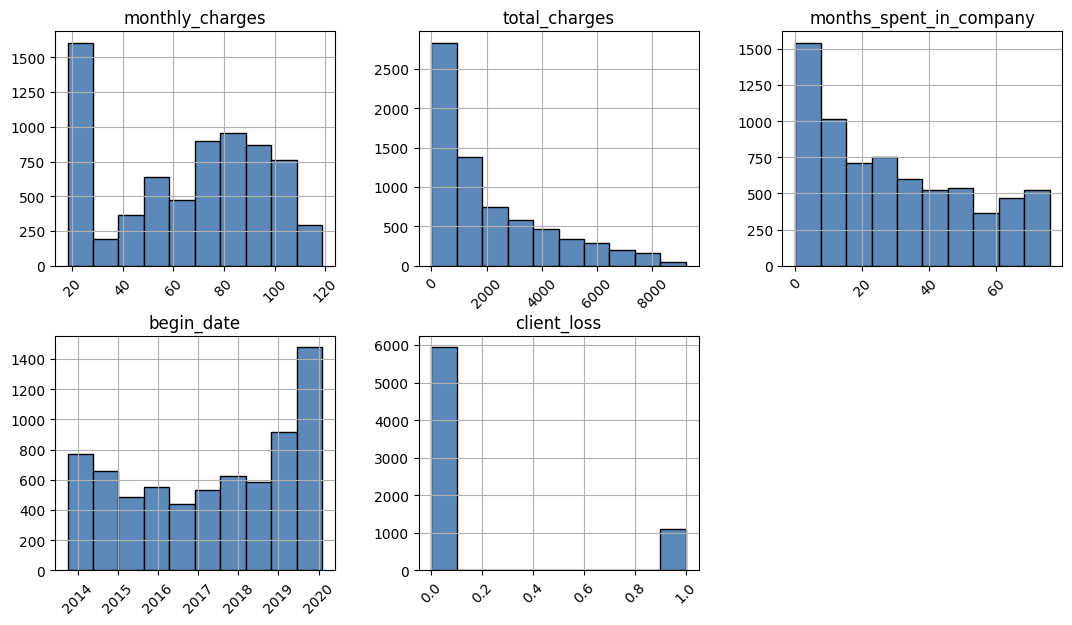

In [16]:
contract_new.hist(
    column = ['monthly_charges','total_charges', 'months_spent_in_company', 'begin_date', 'client_loss'],
    figsize=(13,7), layout=(2,3), 
    color = '#5d89ba', edgecolor = 'black',  
    label="Series", xrot = 45);

Средний ежемесячный расход клиентов - 64.76 у.е., но разброс немалый. Медианный ежемесячный расход - 70.35 у.е. Преобладающее количество клиентов компании платит в районе 20-25 у.е. в месяц (см.гистограмму)

Соответсвенно и общие расходы абонента (total_charges) чаще всего небольшие, как мы видим на гистограмме.

Cредний срок пребывания клиента в компании = 29 месяцев, но разброс очень большой. Медианный срок пребывания - 25 месяцев.

Заметен всплеск около нуля в кол-ве месяцев пребывания в компании, что говорит о том что многие клиенты не задерживаются надолго в компании.

По приходу клиентов есть пики приходов в начале 2014г и в конце 2019г.

Также заметен существенный дисбаланс классов в целевом признаке.

Касаемо оставшихся нечисловых признаков построим круговую диаграмму:


In [17]:
# Цветовая карта
our_cmap = LinearSegmentedColormap.from_list("", ['#6897cc','#9fa8da','#f3e5f5'])

In [18]:
contract_new.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'months_spent_in_company', 'client_loss'],
      dtype='object')

In [19]:
def pie_plots_df (df, inum, figsize, title = None, **kwargs):
    """
    Функция для построения pie plot для нескольких признаков датафрейма
    На вход принимает датафрейм, массив нужных признаков, нужный размер отображения
    и необходимые параметры plot
    """
    if (len(inum) > 1):
        fig, axs = plt.subplots(ncols=len(inum), figsize=figsize)
        fig.suptitle(title or 'Круговая диаграмма для признаков {}'.format(', '.join(inum)))
        i = 0
        for feature in df.loc[:, inum]:
                df[feature].value_counts(normalize=True).plot(
                kind = 'pie', ax = axs[i], subplots=True,
                autopct='%1.0f%%', **kwargs);
                i+=1  
        plt.show()
    else:
        df[inum[0]].value_counts(normalize=True).plot(
            kind = 'pie',
            autopct='%1.0f%%',
            subplots=True,
            title = (title or 'Круговая диаграмма для признака {}'.format(', '.join(inum))),
            **kwargs);

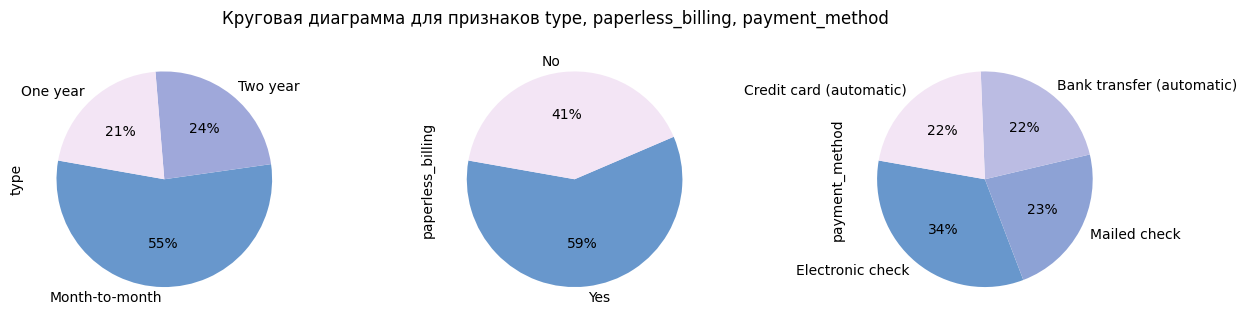

In [20]:
pie_plots_df(
    contract_new, ['type','paperless_billing','payment_method'], 
    figsize=(15,3.5),
    cmap = our_cmap, startangle=170,)


Можно заметить что чаще всего клиенты выбирают ежемесячную оплату, и реже всего выбирают оплату раз в год.

Чаще клиенты предпочитают электронный расчетный лист. Но скорей всего мы этот признак не будем использовать, врядли в нашем случае тип расчетного листа влияет на то уйдет клиент из компании или нет.

Касаемо типов платежей немного лидируют электронные чеки. Остальные типы расположились на равных. Также скорей всего нам этот признак для моделирования не будет полезен.

Будем держать пока в уме кандидаты на удаление - paperless_billing и payment_method.

#### 1.3 Общий обзор и предобработка датафрейма, содержащего персональную информацию о клиентах `personal_new`:

In [21]:
# Общая информация по датафрейму 
# и несколько строк
personal_new.info()
print (display(personal_new.sample(8)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
3930,8849-PRIQJ,Female,0,Yes,Yes
3714,7306-YDSOI,Male,0,Yes,Yes
5422,3563-SVYLG,Male,0,Yes,Yes
1759,2243-FNMMI,Male,0,No,No
513,8677-HDZEE,Female,0,No,No
6128,3317-VLGQT,Female,0,Yes,No
4978,4855-SNKMY,Female,0,No,No
310,1098-TDVUQ,Female,0,No,No


None


* Датафрейм `personal_new` содержит информацию о 7043 клиентах.
* Пропусков в данных нет.
* Названия признаков необходимо привести к стилю snake_case.
* Для более компактного анализа преобразуем категориальные признаки, содержащие Yes/No в числовые бинарные 1/0

In [22]:
# Поиск дубликаты по всему датафрейму
personal_new.duplicated().sum()

0

Дубликатов в датафрейме нет.

Приведем названия признаков к snap_case:

In [23]:
personal_new.rename(columns={
    'customerID': 'customer_id', 				
    'gender': 'gender',		
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents'
}, inplace=True)

# Проверяем
personal_new.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

**Промежуточный итог**
* Датафрейм `personal_new` содержит информацию о 7043 клиентах.
* Пропусков и дубликатов в данных нет.
* Названия признаков были приведены к стилю snape_case.

#### 1.4 Анализ датафрейма, содержащего персональную информацию о клиентах `personal_new`:

Посмотрим графики для признаков нашего датафрейма: 

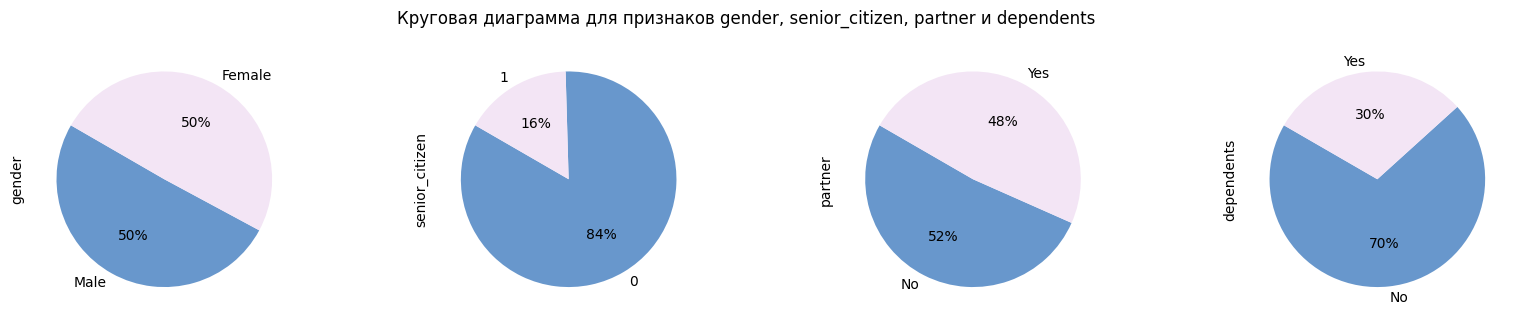

In [24]:
pie_plots_df(
    personal_new, ['gender', 'senior_citizen', 'partner','dependents'], 
    figsize=(20,3.5), 
    title = 'Круговая диаграмма для признаков gender, senior_citizen, partner и dependents',
    cmap = our_cmap, startangle=150,)

Среди клиентов равное соотношение мужчин и женщин. Для моделирования нам скорей всего этот признак не будет полезен. Будем держать его в уме как кандидат на удаление.

Пенсионеры составляют меньшую часть клиентов.

Соотношение клиентов в браке и вне брака примерно одинаковое. 

Клиентов без детей значительно больше чем семейных.

#### 1.5 Общий обзор и предобработка датафрейма с описанием интернет-услуг `internet_new`:

In [25]:
# Общая информация по датафрейму 
# и несколько строк
internet_new.info()
print (display(internet_new.sample(8)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
955,4468-KAZHE,DSL,No,Yes,No,No,No,Yes
312,8204-YJCLA,DSL,Yes,Yes,Yes,Yes,Yes,Yes
4352,5364-EVNIB,Fiber optic,No,Yes,Yes,No,No,No
1993,5397-NSKQG,DSL,Yes,No,No,No,Yes,Yes
1155,5899-OUVKV,Fiber optic,No,Yes,No,No,Yes,Yes
617,2037-XJFUP,Fiber optic,No,No,Yes,No,Yes,Yes
2200,6158-DWPZT,DSL,No,No,No,No,No,No
546,2826-UWHIS,Fiber optic,No,Yes,No,No,No,No


None


* Датафрейм `internet_new` содержит информацию видимо не обо всех клиентах (клиентов 7043, а тут данные только по 5517 customerID)
* Пропусков в данных нет.
* Названия признаков необходимо привести к стилю snake_case.
* Для более компактного анализа преобразуем категориальные признаки, содержащие Yes/No в числовые бинарные 1/0

In [26]:
# Поиск дубликаты по всему датафрейму
internet_new.duplicated().sum()

0

Дубликатов в датафрейме нет.

Приведем названия признаков к snap_case:

In [27]:
internet_new.rename(columns={
    'customerID': 'customer_id', 									
    'InternetService': 'internet_service',	
    'OnlineSecurity': 'online_security',	
    'OnlineBackup': 'online_backup',	
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
}, inplace=True)

# Проверяем
internet_new.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

**Промежуточный итог**
* Датафрейм `internet_new` содержит информацию видимо не обо всех клиентах (клиентов 7043, а тут данные только по 5517 customerID)
* Пропусков и дубликатов в данных нет.
* Названия признаков были приведены к стилю snape_case.

#### 1.6 Анализ датафрейма с описанием интернет услуг `internet_new`:

Посмотрим на графики признаков нашего датарейма:

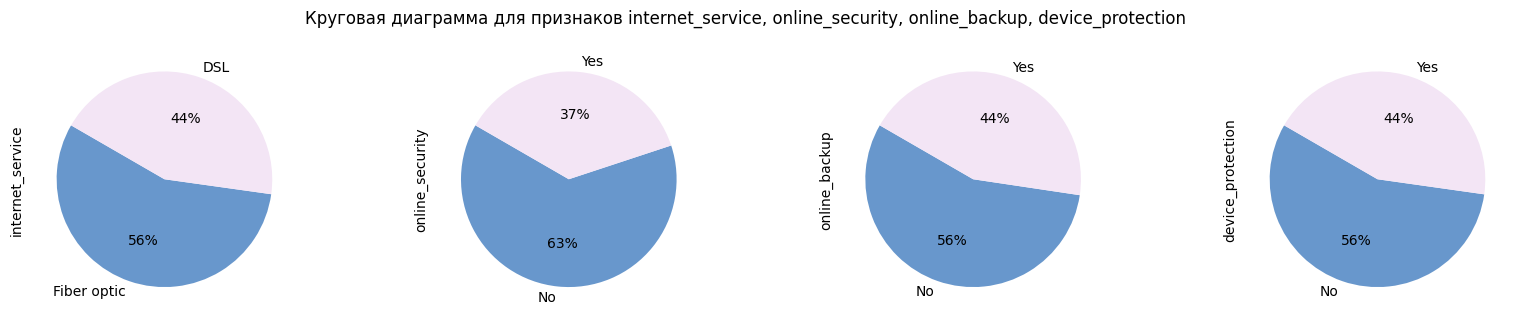

In [28]:
pie_plots_df(
    internet_new, 
    ['internet_service', 'online_security', 'online_backup', 'device_protection'], 
    figsize=(20,3.5), cmap = our_cmap, startangle=150,)

Чуть больше половины клииентов предпочитают оптоволокно (56%) остальные на DSL.

Большая часть клиентов предпочитает обходится без услуги блокировки опасных сайтов.

56% клиентов ползуются облачным хранилищем файлов для резервного копирования данных. 

56% клиентов пользуются антивирусом.

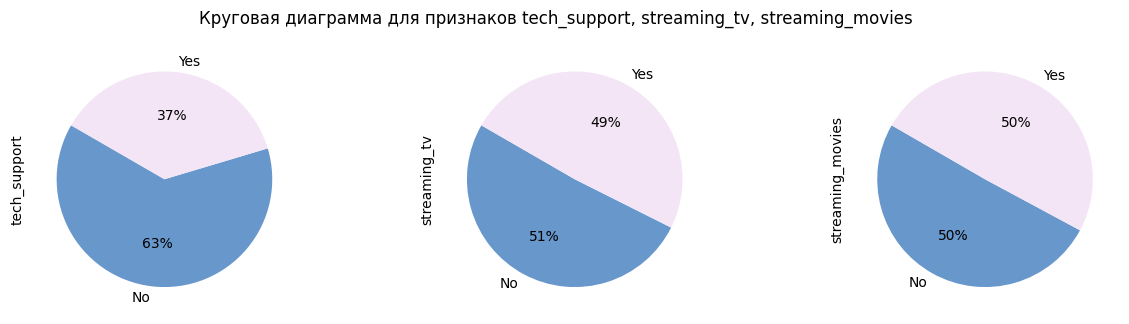

In [29]:
pie_plots_df(
    internet_new, ['tech_support', 'streaming_tv', 'streaming_movies'], 
    figsize=(15,3.5), cmap = our_cmap, startangle=150,)

Большая часть клиентов не использует выделенную линию технической поддержки.

Группы клиентов использующих стриминговое телевидение или каталог фильмов и неиспользующих данные опции примерно равны.

#### 1.7 Общий обзор, предобработка и анализ датафрейма, содержащего информацию об услугах телефонии `phone_new`:

In [30]:
# Общая информация по датафрейму 
# и несколько строк
phone_new.info()
print (display(phone_new.sample(8)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
5750,3407-QGWLG,No
5171,3312-ZWLGF,Yes
4056,7083-YNSKY,Yes
1381,6184-DYUOB,No
3140,7274-RTAPZ,No
554,6689-VRRTK,Yes
6177,9129-UXERG,Yes
2244,7140-ADSMJ,No


None


* Датафрейм `phone_new` содержит информацию видимо не обо всех клиентах (клиентов 7043, а тут данные только по 6361 customerID)
* Пропусков в данных нет.
* Названия признаков необходимо привести к стилю snake_case.
* Преобразуем категориальный признак MultiLines в числовый бинарный 1/0

In [31]:
# Поиск дубликаты по всему датафрейму
phone_new.duplicated().sum()

0

Дубликатов в датафрейме нет.

Приведем названия признаков к snap_case:

In [32]:
phone_new.rename(columns={
    'customerID': 'customer_id', 				
    'MultipleLines': 'multiple_lines',		
}, inplace=True)

# Проверяем
phone_new.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

Посмотрим на соотношение клиентов с мультилинейным подключением и без:

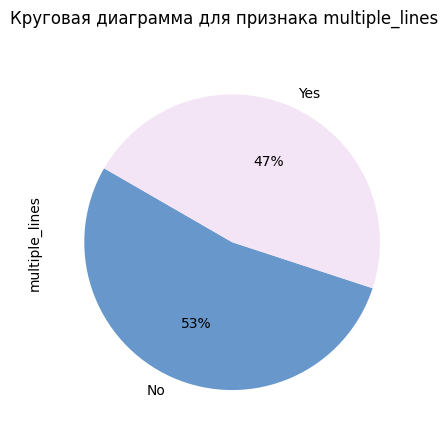

In [33]:
pie_plots_df(
    phone_new, ['multiple_lines'], figsize=(5,3.5), 
    cmap = our_cmap, startangle=150,)

Соотношение клиентов обеих групп примерно одинаковое. Чуть больше клиентов без мультилинейного подключения телефона (53%).

#### <a id='section_2'></a>
### Шаг 2. Объединение данных

Объединим данные из датареймов в один, для их совместного анализа и последующего моделирования. Ключом для объединения выступит признак customer_id:

In [34]:
# Присоединяем к personal_new датафрейм contract_new
all_data = personal_new.merge(contract_new, on='customer_id', how='left')

# Проверяем
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   gender                   7043 non-null   object        
 2   senior_citizen           7043 non-null   int64         
 3   partner                  7043 non-null   object        
 4   dependents               7043 non-null   object        
 5   begin_date               7043 non-null   datetime64[ns]
 6   end_date                 7043 non-null   datetime64[ns]
 7   type                     7043 non-null   object        
 8   paperless_billing        7043 non-null   object        
 9   payment_method           7043 non-null   object        
 10  monthly_charges          7043 non-null   float64       
 11  total_charges            7043 non-null   float64       
 12  months_spent_in_company  7043 non-

In [35]:
# Присоединяем следующие internet_new и phone_new
all_data = all_data.merge(internet_new, on='customer_id', how='left')
all_data = all_data.merge(phone_new, on='customer_id', how='left')

# Проверяем
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   gender                   7043 non-null   object        
 2   senior_citizen           7043 non-null   int64         
 3   partner                  7043 non-null   object        
 4   dependents               7043 non-null   object        
 5   begin_date               7043 non-null   datetime64[ns]
 6   end_date                 7043 non-null   datetime64[ns]
 7   type                     7043 non-null   object        
 8   paperless_billing        7043 non-null   object        
 9   payment_method           7043 non-null   object        
 10  monthly_charges          7043 non-null   float64       
 11  total_charges            7043 non-null   float64       
 12  months_spent_in_company  7043 non-

У нас получился датафрейм с пустыми значениями в некоторых признаках ввиду того, что датафреймы internet_new и phone_new содержали меньше объектов чем датафреймы с основной информацей personal_new и contract_new.

В следующем разделе проанализируем объединенный датафрейм, проведем необходимую предобработку, в том числе решим что делать с пропусками и какие признаки оставлять.

#### <a id='section_3'></a>
### Шаг 3. Исследовательский анализ и предобработка объединенных данных.

#### 3.1 Посмотрим на распределения признаков для ушедших и неушедших клиентов:

In [36]:
data_activ_client = all_data.loc[all_data['client_loss'] != 1]
data_loss_client = all_data.loc[all_data['client_loss'] == 1]

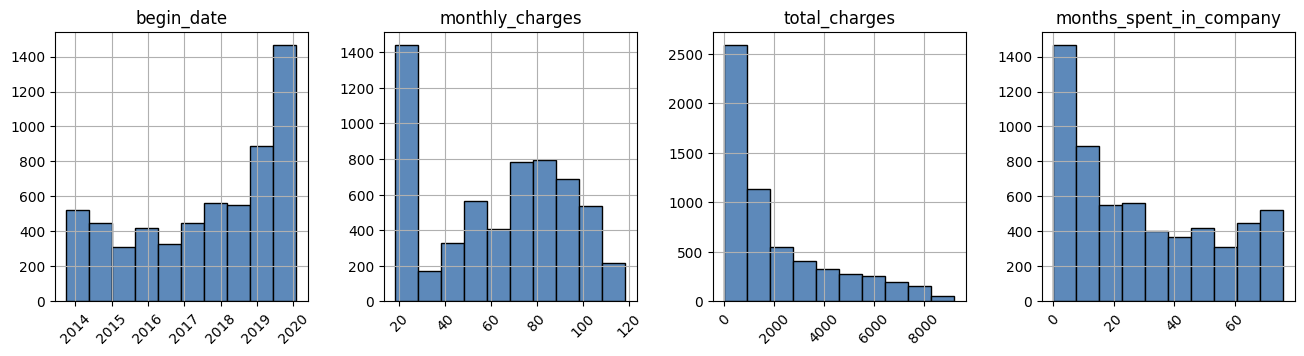

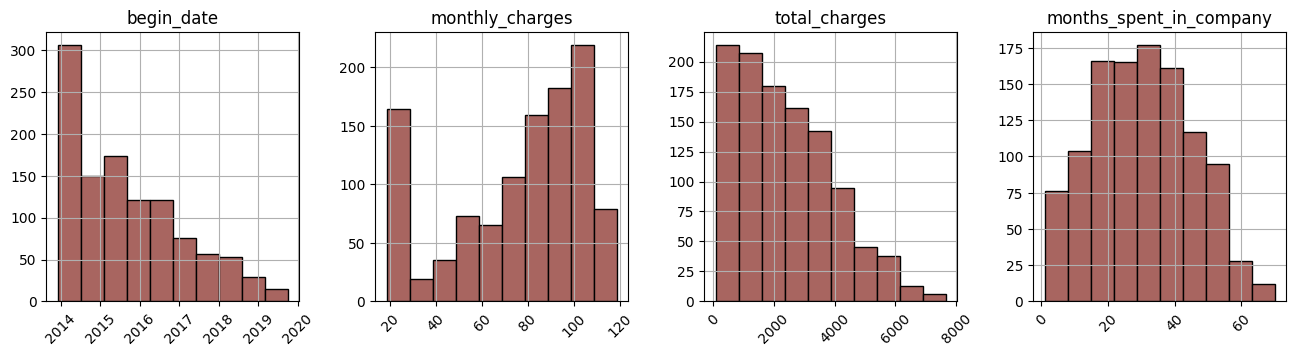

In [37]:
# Активных в синем оттенке
data_activ_client.hist(
    column = ['begin_date','monthly_charges','total_charges','months_spent_in_company'],
    figsize=(16,3.5), layout=(1,4), 
    color = '#5d89ba', edgecolor = 'black',  
    label="Series", xrot = 45);

# Ушедших в красном оттенке
data_loss_client.hist(
    column = ['begin_date','monthly_charges','total_charges','months_spent_in_company'],
    figsize=(16,3.5), layout=(1,4), 
    color = '#a86560', edgecolor = 'black',  
    label="Series", xrot = 45);

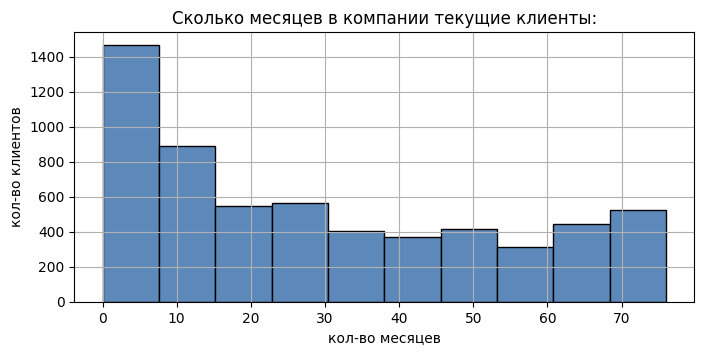

In [38]:
data_activ_client['months_spent_in_company'].hist(
    figsize=(8,3.5), 
    color = '#5d89ba', edgecolor = 'black');

plt.title('Сколько месяцев в компании текущие клиенты:');
plt.ylabel('кол-во клиентов');
plt.xlabel('кол-во месяцев');

In [39]:
data_activ_client['months_spent_in_company'].median()

23.064128626871188

In [40]:
data_loss_client['months_spent_in_company'].median()

30.062218936733814

Среди ушедших больше всего клиентов с датой начала действия договора в 2014-2015г, а среди текущих клиентов больше всего с датой начала действия 2019-2020г.

У ушедших клиентов были значительно больше расходы за месяц, и + они долго были клиентами получаем и более высокие общие расходы абонента. 

Текущие клиенты в большинстве своем находятся в компании 1-2 года, ушедшие же клиенты в среднем дольше.

Сравним персональные признаки и типы платежей:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


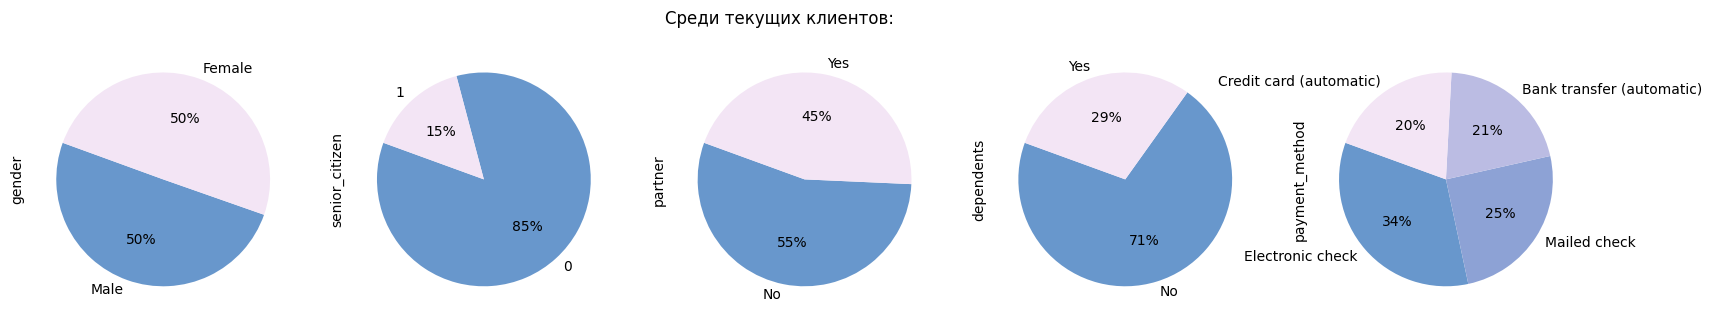

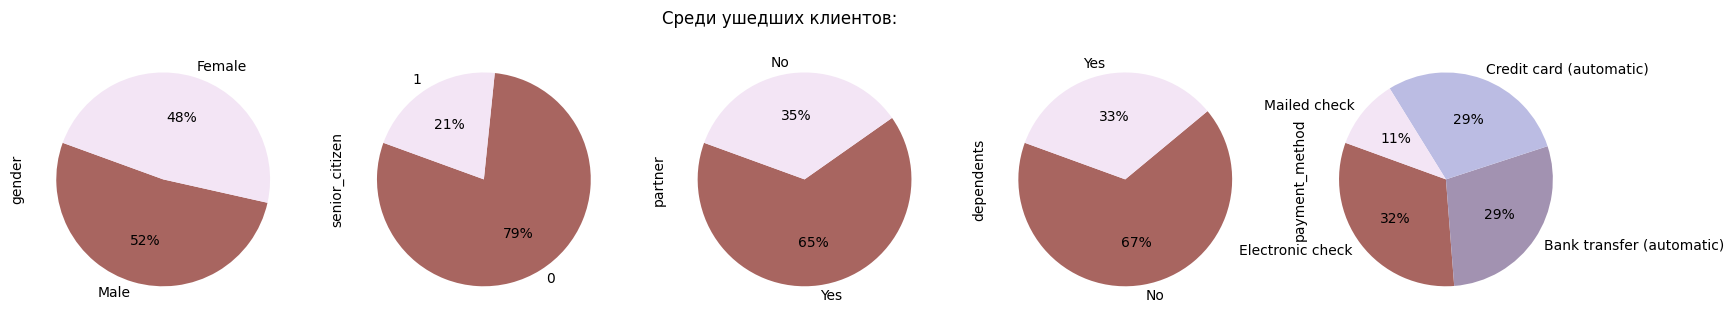

In [41]:
pie_plots_df(
    data_activ_client, ['gender', 'senior_citizen', 'partner', 'dependents', 'payment_method'], 
    figsize=(20,3.5), title = 'Среди текущих клиентов:',
    cmap = our_cmap, startangle=160,)

#Цветовая карта для ушедших клиентов
our_cmap_loss = LinearSegmentedColormap.from_list("", ['#a86560','#9fa8da','#f3e5f5'])

pie_plots_df(
    data_loss_client, ['gender', 'senior_citizen', 'partner', 'dependents', 'payment_method'], 
    figsize=(20,3.5), title = 'Среди ушедших клиентов:',
    cmap = our_cmap_loss, startangle=160,)

Количество мужчин и женщин среди обоих групп почти одинаковое.

Количество пенсионеров среди ушедших клиентов чуть больше чем среди текущих (21% против 15%).

Количество клиентов в браке среди ушедших больше на 10% чем среди текущих.

Кол-во клиентов с детьми почти не изменилось.

Есть некоторые различия по типу используемых платежей для групп ушедших и оставшихся. В обоих группах лидирует Electronic check, однако дальше в группе ушедших в равных пропорциях предпочитали Bank transfer и  Credit card, а среди текущих на втором месте mailed check.

Сравним пользование интернет-услугами и телефонией: 

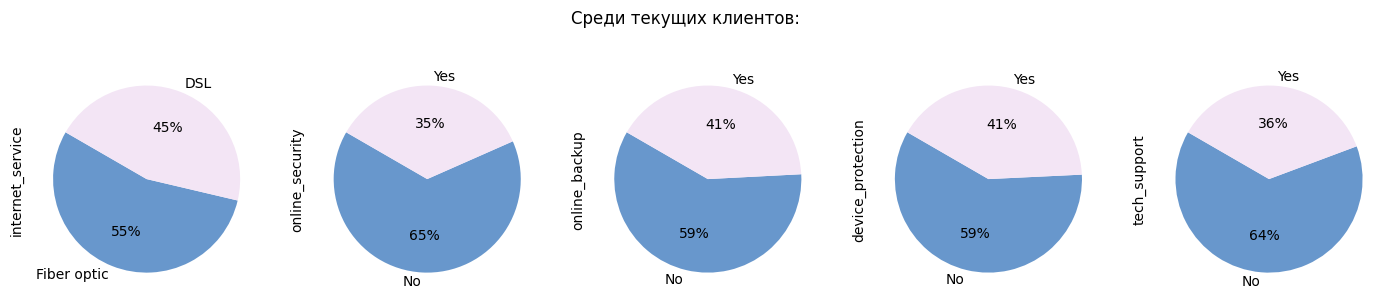

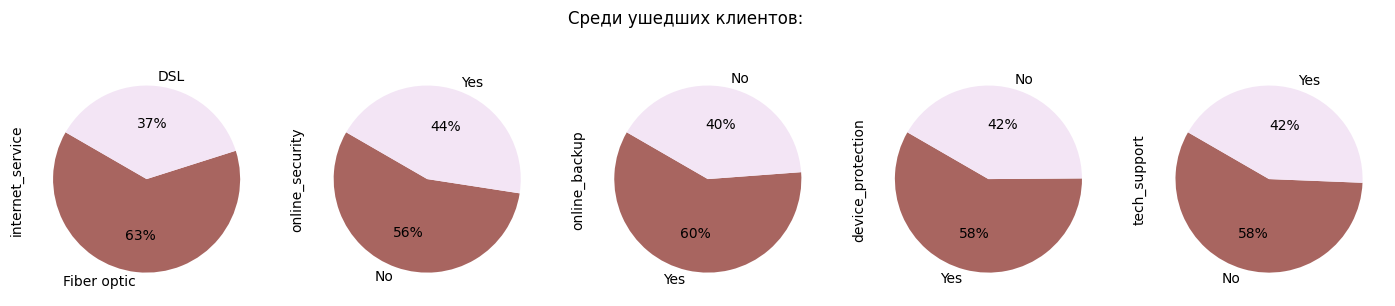

In [42]:
pie_plots_df(
    data_activ_client, 
    ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support'], 
    figsize=(17.5,3.5), title = 'Среди текущих клиентов:',
    cmap = our_cmap, startangle=150,)

pie_plots_df(
    data_loss_client, 
    ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support'], 
    figsize=(17.5,3.5), title = 'Среди ушедших клиентов:',
    cmap = our_cmap_loss, startangle=150,)

Ушедшие клиенты чаще текущих предпочитали оптоволокно (63% использующих оптоволокно против 55%).

У ушедших клиентов чаще чем у текущих была установлена услуга блокировки опасных сайтов (44% против 35%).

Ушедшие клиенты намного чаще текущих использовали услугу облачного хранилища (60% использующих облачное хранилище против 41%).

Ушедшие клиенты намного чаще текущих пользовались антивирусом компании (58% использующих антивирус против 41%).

Ушедшие клиенты чаще использовали выделенную линию технической поддержки (42% против 36%).

Сравним оставшиеся признаки:

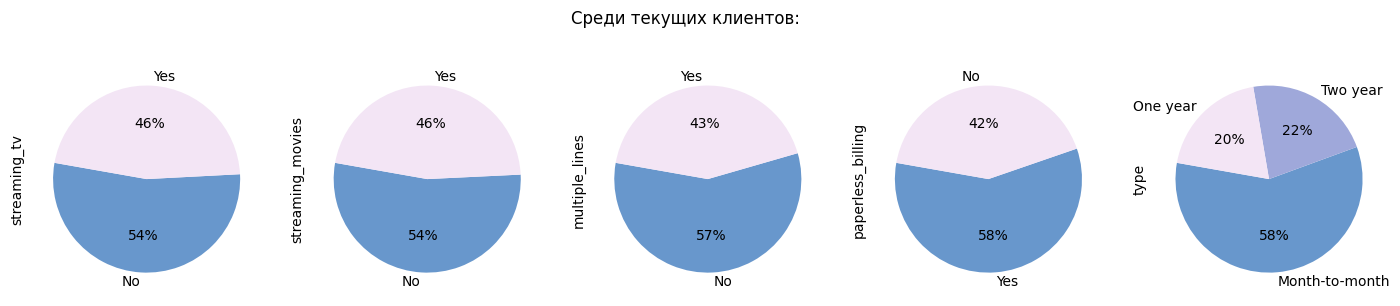

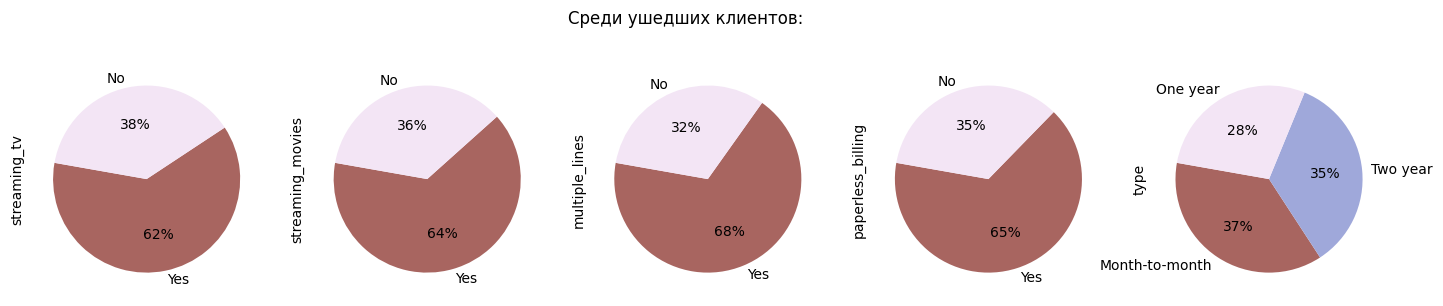

In [43]:
pie_plots_df(
    data_activ_client, 
    ['streaming_tv', 'streaming_movies', 'multiple_lines', 'paperless_billing','type' ], 
    figsize=(17.5,3.5), title = 'Среди текущих клиентов:',
    cmap = our_cmap, startangle=170,)

pie_plots_df(
    data_loss_client, 
    ['streaming_tv', 'streaming_movies', 'multiple_lines', 'paperless_billing','type' ], 
    figsize=(17.5,3.5), title = 'Среди ушедших клиентов:',
    cmap = our_cmap_loss, startangle=170,) 

Ушедшие активнее использовали услугу стримингового ТВ(62% против 46%) и каталога (64% против 46%).

Также ушедшие клиенты сущетсвенно чаще выбирали подключение телефона к нескольким линиям одновременно (68% пользующихся услугой среди ушедших против 43% среди текущих).

Ушедшие чуть чаще чем текущие пользовались электронным расчётным листом (65% против 58%)

Ушелшие значительно чаще выбирали тип оплаты раз в год/два чем текущие клиенты. Текущие клиенты чаще всего предпочитают платить ежемесячно.

**Итого соберем весь пазл:**

* Среди ушедших больше всего клиентов с датой начала действия договора в 2014-2015г, а среди текущих клиентов больше всего с датой начала действия 2019-2020г. Т.е ушедшие клиенты были давними клиентами.Текущие клиенты в большинстве своем находятся в компании 1-2 года, ушедшие же клиенты в среднем дольше.
* У ушедших клиентов были значительно больше расходы за месяц, и + они долго были клиентами, получаем и более высокие общие расходы абонента.
  
Более большие расходы за месяц среди группы ушедших клиентов обусловлены разницей в следующих признаках:

* Ушедшие клиенты чаще текущих предпочитали оптоволокно (63% использующих оптоволокно против 55%).
* Ушедшие активнее использовали услугу стримингового ТВ(62% против 46%) и каталога (64% против 46%).
* Ушедшие клиенты намного чаще текущих использовали услугу облачного хранилища (60% использующих облачное хранилище против 41%).
* У ушедших клиентов чаще чем у текущих была установлена услуга блокировки опасных сайтов (44% против 35%).
* Ушедшие клиенты намного чаще текущих пользовались антивирусом компании (58% использующих антивирус против 41%).
* Ушедшие клиенты чаще использовали выделенную линию технической поддержки (42% против 36%).
* Также ушедшие клиенты сущетсвенно чаще выбирали подключение телефона к нескольким линиям одновременно (68% пользующихся услугой среди ушедших против 43% среди текущих).
  
Дальнейший анализ:

* Ушедшие чуть чаще чем текущие пользовались электронным расчётным листом (65% против 58%)
* Ушелшие значительно чаще выбирали тип оплаты раз в год/два чем текущие клиенты. Текущие клиенты чаще всего предпочитают платить ежемесячно.
* Есть некоторые различия по типу используемых платежей для групп ушедших и оставшихся. В обоих группах лидирует Electronic check, однако дальше в группе ушедших в равных пропорциях предпочитали Bank transfer и  Credit card, а среди текущих на втором месте mailed check.
* Количество мужчин и женщин среди обоих групп почти одинаковое.
* Количество пенсионеров среди ушедших клиентов чуть больше чем среди текущих (21% против 15%).
* Количество клиентов в браке среди ушедших больше на 10% чем среди текущих.
* Кол-во клиентов с детьми почти не изменилось.

**Краткое резюме:** Ушедшие клиенты чаще пользовались подключением по оптоволокну, мультилинейным подключением телефона и охотнее подключали и использовали различные доп.интернет-услуги компании. Расходы за месяц в среднем у ушедших клиентов были выше, и они дольше были клиентами компании.

Конечно вышеприведенный анализ это не 100% утверждения, это гипотезы, для которых можно при необходимости использовать методы проверки гипотез. Однако нам пока достаточно данных гипотез.

#### 3.2 Анализ и предобработка объединенных данных: 

Сохраним копию датафрейма на данном этапе:

In [44]:
all_data_copy = all_data.copy()

Признаки 'end_date' и 'begin_date' удалим, так как они сопряжены с определенным временным промежутком, и у нас может возникнуть ошибка в предсказанях модели при использовании более поздних дат.

У нас останется достаточно информации в 'months_spent_in_company' и в целевом признаке. 

In [45]:
del all_data['end_date']
del all_data['begin_date']

#Проверяем
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   gender                   7043 non-null   object 
 2   senior_citizen           7043 non-null   int64  
 3   partner                  7043 non-null   object 
 4   dependents               7043 non-null   object 
 5   type                     7043 non-null   object 
 6   paperless_billing        7043 non-null   object 
 7   payment_method           7043 non-null   object 
 8   monthly_charges          7043 non-null   float64
 9   total_charges            7043 non-null   float64
 10  months_spent_in_company  7043 non-null   float64
 11  client_loss              7043 non-null   int8   
 12  internet_service         5517 non-null   object 
 13  online_security          5517 non-null   object 
 14  online_backup           

Посмотрим на Фи-коррелляцию признаков:

In [46]:
phik_overview_all = all_data.drop('customer_id', axis=1).phik_matrix()
#phik_overview_all.round(2)

interval columns not set, guessing: ['senior_citizen', 'monthly_charges', 'total_charges', 'months_spent_in_company', 'client_loss']


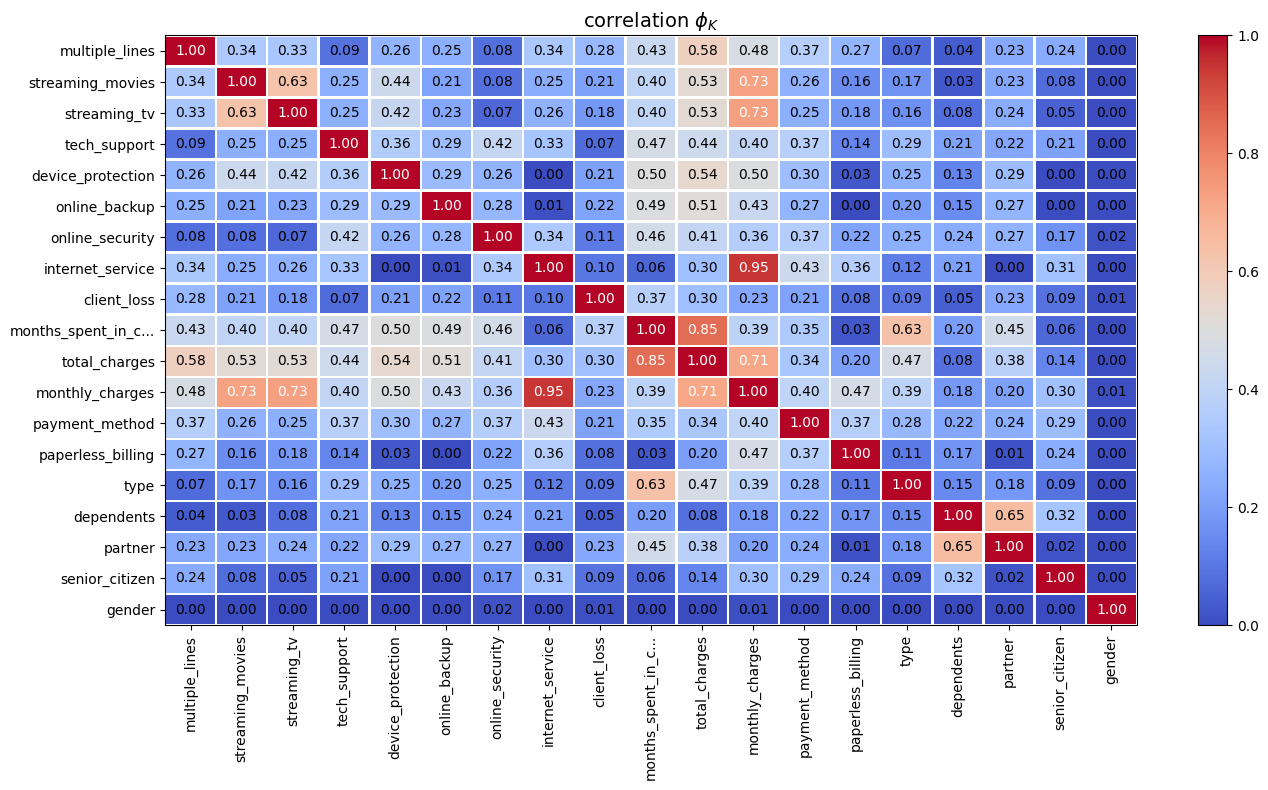

In [47]:
plot_correlation_matrix(phik_overview_all.values, 
                        x_labels= phik_overview_all.columns, 
                        y_labels= phik_overview_all.index, 
                        vmin=0, vmax=1, color_map='coolwarm', 
                        title=r'correlation $\phi_K$', 
                        figsize=(14, 8))
plt.tight_layout()

При оценке корреляций рекомендуется оценивать как корреляцию, так и ее значимость: большая корреляция может быть статистически незначительной, и наоборот, малая корреляция может быть очень значимой.

Построим график матрицы значимостей:

interval columns not set, guessing: ['senior_citizen', 'monthly_charges', 'total_charges', 'months_spent_in_company', 'client_loss']


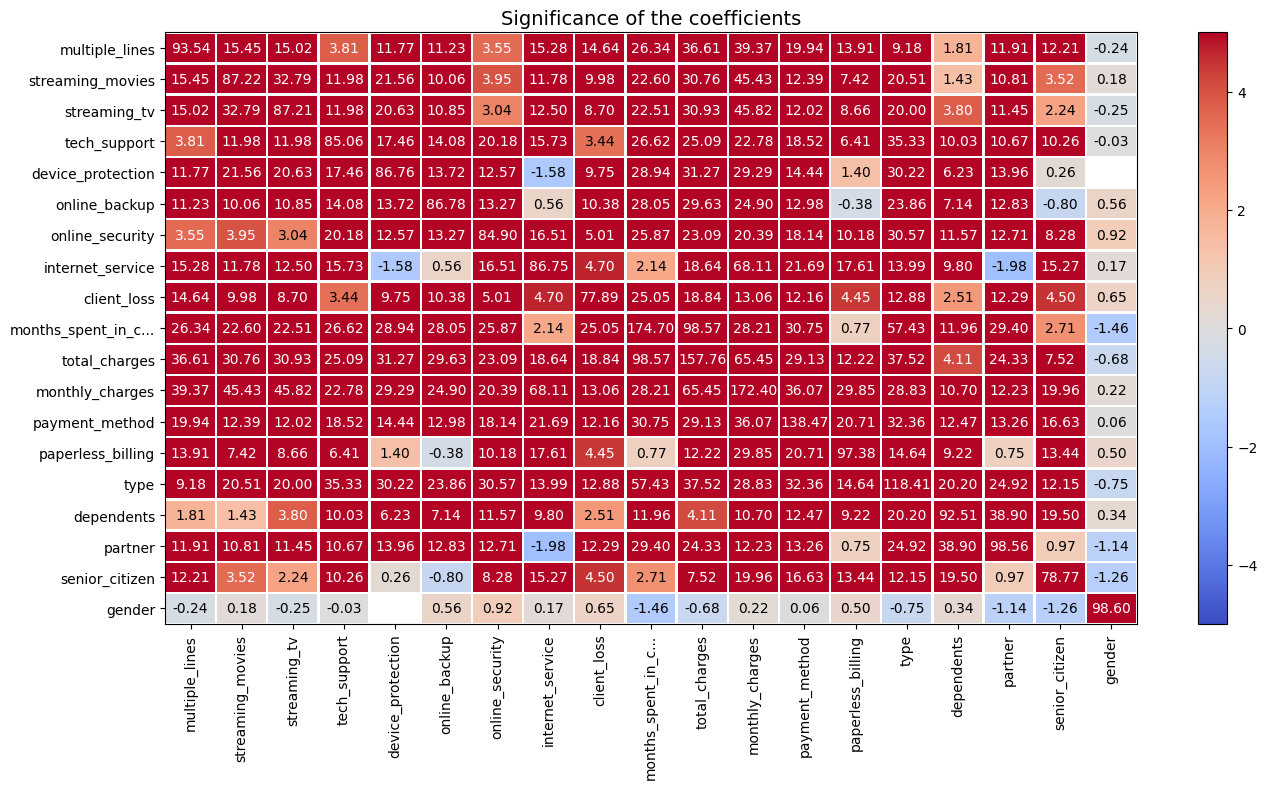

In [48]:
significance_overview = all_data.drop('customer_id', axis=1).significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False,color_map='coolwarm', figsize=(14, 8))
plt.tight_layout()

И заодно классическая корреляция Пирсона для количественных признаков:

In [49]:
#корреляция Пирсона
round(all_data[['monthly_charges', 'total_charges', 'months_spent_in_company']].corr(),2)

,monthly_charges,total_charges,months_spent_in_company
monthly_charges,1.00,0.63,0.22
total_charges,0.63,1.00,0.82
months_spent_in_company,0.22,0.82,1.00


Бустинги и деревья не чувствительны к мультикорреляции, однако мы хотим пробовать и модель линейной регрессии, поэтому мультиколлинеарность между количественными признаками будем удалять.

Корреляцию категориальных признаков пока просто проанализируем и возьмем на заметку, так как она может быть нелинейной и не влиять на линейные модели.

Итак, что мы имеем:

* gender имеет почти нулевую корреляцию с целевым признаком, низкую стат.значимость, и этот признак итак у нас был кандидатом на удаление, удалим его.

* partner коррелирует с признаком dependents (0.65), и при этом у dependents очень слабая корреляция с целевым признаком и также существенно ниже стат.значимость.

* monthly_charges сильно коррелирует с streaming_movies (0.73), streaming_tv (0.73) и internet_service (0.95). И при этом корреляция monthly_charges с целевым признаком и ее стат значимость выше чем у перечисленных признаков. 

* monthly_charges также сильно коррелирует с total_charges (0.71), а total_sharges сильно коррелирует с months_spent_in_company(0.85). Учитывая корреляции корреляции данных признаков с целевым их стат значимость и здравый смысл, исключим из моделирования признак total_charges и monthly_charges.

* type статистически значимо коррелирует с признаком months_spent_in_company (0.63).

Итого удалим следующие признаки: gender, monthly_charges и total_charges.


In [50]:
del all_data['gender']
del all_data['monthly_charges']
del all_data['total_charges']

# Проверяем
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   senior_citizen           7043 non-null   int64  
 2   partner                  7043 non-null   object 
 3   dependents               7043 non-null   object 
 4   type                     7043 non-null   object 
 5   paperless_billing        7043 non-null   object 
 6   payment_method           7043 non-null   object 
 7   months_spent_in_company  7043 non-null   float64
 8   client_loss              7043 non-null   int8   
 9   internet_service         5517 non-null   object 
 10  online_security          5517 non-null   object 
 11  online_backup            5517 non-null   object 
 12  device_protection        5517 non-null   object 
 13  tech_support             5517 non-null   object 
 14  streaming_tv            

Теперь надо подумать что делать с имеющимися признаками, ведь у нас есть пропуски. 

Идей как заполнить пропуски на основе других признаков нет. Заполнять признаки, в которых распределение значений близко к 50/50 случайным образом от 0 и 1 ну не совсем хорошо.. Возможно просто закроем все признаки заглушкой `unknown` и посмотрим на результаты моделей, на важность признаков. 

Но глянем еще может можно удалить часть пропусков, посмотрим насколько часто встречаются пропуски сразу в нескольких признаках:

In [51]:
# Информация по части датафрейма для которой
# multiple_lines пусто
all_data.query('multiple_lines.isna()').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 7040
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              682 non-null    object 
 1   senior_citizen           682 non-null    int64  
 2   partner                  682 non-null    object 
 3   dependents               682 non-null    object 
 4   type                     682 non-null    object 
 5   paperless_billing        682 non-null    object 
 6   payment_method           682 non-null    object 
 7   months_spent_in_company  682 non-null    float64
 8   client_loss              682 non-null    int8   
 9   internet_service         682 non-null    object 
 10  online_security          682 non-null    object 
 11  online_backup            682 non-null    object 
 12  device_protection        682 non-null    object 
 13  tech_support             682 non-null    object 
 14  streaming_tv             

Пропуски в признаке multiple_lines не сопряжены с пропусками в других признаках. Пропуски в данном признаке точно заполним заглушкой 'unknown'.

In [52]:
all_data.query('online_security.isna()').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 11 to 7037
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              1526 non-null   object 
 1   senior_citizen           1526 non-null   int64  
 2   partner                  1526 non-null   object 
 3   dependents               1526 non-null   object 
 4   type                     1526 non-null   object 
 5   paperless_billing        1526 non-null   object 
 6   payment_method           1526 non-null   object 
 7   months_spent_in_company  1526 non-null   float64
 8   client_loss              1526 non-null   int8   
 9   internet_service         0 non-null      object 
 10  online_security          0 non-null      object 
 11  online_backup            0 non-null      object 
 12  device_protection        0 non-null      object 
 13  tech_support             0 non-null      object 
 14  streaming_tv           

А вот пропуски в дополнительных слугах встречаются сразу по всем признакам одновременно. Можно предположить, что в этом случае клинету вовсе ничего не подключено, ни одна из услуг (и заполнить значениями No), либо это сбой при записи/выгрузке данных и заполнить (unknown). 

В реальной рабочей ситуации наверное можно было бы привлечь какое-то экспертное мнение для совета, но в текущей ситуации остановимся все же на заполнении 'No'


In [53]:
all_data.loc[all_data['multiple_lines'].isna(),'multiple_lines'] = "No"

# Проверим
all_data['multiple_lines'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
all_data.loc[all_data['internet_service'].isna(),'internet_service'] = "No"
all_data.loc[all_data['online_security'].isna(),'online_security'] = "No"
all_data.loc[all_data['online_backup'].isna(),'online_backup'] = "No"
all_data.loc[all_data['device_protection'].isna(),'device_protection'] = "No"
all_data.loc[all_data['tech_support'].isna(),'tech_support'] = "No"
all_data.loc[all_data['streaming_tv'].isna(),'streaming_tv'] = "No"
all_data.loc[all_data['streaming_movies'].isna(),'streaming_movies'] = "No"

#Проверяем 
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   senior_citizen           7043 non-null   int64  
 2   partner                  7043 non-null   object 
 3   dependents               7043 non-null   object 
 4   type                     7043 non-null   object 
 5   paperless_billing        7043 non-null   object 
 6   payment_method           7043 non-null   object 
 7   months_spent_in_company  7043 non-null   float64
 8   client_loss              7043 non-null   int8   
 9   internet_service         7043 non-null   object 
 10  online_security          7043 non-null   object 
 11  online_backup            7043 non-null   object 
 12  device_protection        7043 non-null   object 
 13  tech_support             7043 non-null   object 
 14  streaming_tv            

Еще удалим идентификатор клиента, для моделирования он нам не нужен:

In [55]:
del all_data['customer_id']

# Проверка
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   senior_citizen           7043 non-null   int64  
 1   partner                  7043 non-null   object 
 2   dependents               7043 non-null   object 
 3   type                     7043 non-null   object 
 4   paperless_billing        7043 non-null   object 
 5   payment_method           7043 non-null   object 
 6   months_spent_in_company  7043 non-null   float64
 7   client_loss              7043 non-null   int8   
 8   internet_service         7043 non-null   object 
 9   online_security          7043 non-null   object 
 10  online_backup            7043 non-null   object 
 11  device_protection        7043 non-null   object 
 12  tech_support             7043 non-null   object 
 13  streaming_tv             7043 non-null   object 
 14  streaming_movies        

И изменим тип признака senior_citizen на категориальный (Yes/No):

In [56]:
all_data.loc[all_data['senior_citizen'] == 1,['senior_citizen']] = "Yes"
all_data.loc[all_data['senior_citizen'] == 0,['senior_citizen']] = "No"

#Проверим
all_data.head()

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,months_spent_in_company,client_loss,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,No,Yes,No,Month-to-month,Yes,Electronic check,1.018501,0,DSL,No,Yes,No,No,No,No,No
1,No,No,No,One year,No,Mailed check,34.037660,0,DSL,Yes,No,Yes,No,No,No,No
2,No,No,No,Month-to-month,Yes,Mailed check,4.041151,0,DSL,Yes,Yes,No,No,No,No,No
3,No,No,No,One year,No,Bank transfer (automatic),45.044046,0,DSL,Yes,No,Yes,Yes,No,No,No
4,No,No,No,Month-to-month,Yes,Electronic check,5.026797,0,Fiber optic,No,No,No,No,No,No,No


#### <a id='section_4'></a>
### Шаг 4. Подготовка данных к обучению

#### 4.1 Разделение на обучающую и тестовую выборки:

Данные разделим на обучающую и тестовую выборки (75% к 25%):

In [57]:
# Выделение из датафрейма общего набора признаков и целевого
target = all_data['client_loss']
features = all_data.drop(['client_loss'] , axis=1)

# Отделение 25% в тестовую выборку features_test, target_test
features_train, features_test, target_train, target_test = train_test_split(
   features, target, test_size = 0.25, random_state=RANDOM_STATE) 

# Проверка размеров выборок
print (features_train.shape, features_test.shape)

(5282, 15) (1761, 15)


Помним о том, что у нас есть существенный дисбаланс классов в целевом признаке. 

#### 4.2 Стандартизация числовых признаков и кодирование категориальных:

In [58]:
# Отбор числовых признаков
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features

['months_spent_in_company']

Проводем стандартизацию числовых признаков и кодирование категориальных для подачи в модели Логистической регрессии и Случайного леса. Для этого сделаем копию датафрейма, которая будет содержать такую обработку. А исходный датафрейм оставим неизмененным для подачи в модель LGBM.

Чтобы выбрать способ кодирования, посмотрим количество уникальных значений наших категориальных признаков:

In [59]:
cat_features = (features_train.select_dtypes(include=[object])).columns.to_list()

for feature in cat_features:
    print ('Кол-во уникальных значений',feature, len(features_train[feature].value_counts()))

Кол-во уникальных значений senior_citizen 2
Кол-во уникальных значений partner 2
Кол-во уникальных значений dependents 2
Кол-во уникальных значений type 3
Кол-во уникальных значений paperless_billing 2
Кол-во уникальных значений payment_method 4
Кол-во уникальных значений internet_service 3
Кол-во уникальных значений online_security 2
Кол-во уникальных значений online_backup 2
Кол-во уникальных значений device_protection 2
Кол-во уникальных значений tech_support 2
Кол-во уникальных значений streaming_tv 2
Кол-во уникальных значений streaming_movies 2
Кол-во уникальных значений multiple_lines 2


Закодируем признаки с помощью OneHotEncoder:

In [60]:
# Создадим копию датафрейма
features_train_code = features_train.copy()
features_test_code = features_test.copy()

In [61]:
col_transformer = make_column_transformer(
    (
        # drop='first' удаляет первый признак из закодированных:
        # таким образом обходим dummy-ловушку
        OneHotEncoder(drop='first', handle_unknown='error'),
        cat_features 
    ),
    (
        StandardScaler(),
        num_features
    ),
    # remainder='passthrough, чтобы он не пропали признаки,
    # которые не будем кодировать
    remainder='passthrough',
    # использование всех процессоров для паралельных вычислений
    n_jobs = -1
)

res = col_transformer.fit_transform(features_train_code, target_train)

In [62]:
# настроим получение понятных имен признаков
# так как просто get_feature_names "не женится" с StandardScaler
tx = col_transformer.get_params()['transformers']

feature_names = []
for name,transformer,features in tx:
    try:
        Var = col_transformer.named_transformers_[name].get_feature_names(cat_features).tolist()
    except AttributeError:
        Var = features
    feature_names = feature_names + Var

In [63]:
# Проверка имен
feature_names

['senior_citizen_Yes',
 'partner_Yes',
 'dependents_Yes',
 'type_One year',
 'type_Two year',
 'paperless_billing_Yes',
 'payment_method_Credit card (automatic)',
 'payment_method_Electronic check',
 'payment_method_Mailed check',
 'internet_service_Fiber optic',
 'internet_service_No',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'multiple_lines_Yes',
 'months_spent_in_company']

In [64]:
# Собираем в датайрем
features_train_code = pd.DataFrame(
     res, 
     columns=feature_names
 )

# смотрим на результат
print(features_train_code.shape)
print (display(features_train_code.head()))

(5282, 19)


,senior_citizen_Yes,partner_Yes,dependents_Yes,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes,months_spent_in_company
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.326132
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.230436
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.571387
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.275745
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.840315


None


#### <a id='section_5'></a>
### Шаг 5. Обучение моделей машинного обучения и выбор лучшей модели.

Еще раз проговорим: 
* Перед нами задача бинарной классификации.
* Для решения задачи попробуем три модели от самой простой до бустинга: Логистическую регрессию, Случайный лес и LGBM.
* В качестве основной метрики возьмем ROC_AUC, дополнительно будем анализировать и accuracy.

Напишем вспомогательную функцию для отрисовки ROC кривой:

In [65]:
def plot_roc_curve(roc_auc, fpr, tpr):
    """
    Функция для отрисовки ROC_AUC кривой
    На вход принимает значение auc_roc и доли fpr, tpr
    """
    plt.figure()
    # ROC-кривая нашей модели
    plt.plot(fpr, tpr, label='ROC кривая (площадь = %0.2f)' % roc_auc)
    # ROC-кривая случайной модели
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Доля ложных срабатываний")
    plt.ylabel("Доля верно предсказанных объектов")
    plt.title("ROC-кривая")
    plt.legend(loc="lower right")
    plt.show()

#### 5.1 Модель линейной регресси

Для данной модели используем выборку со стандартизированными числовыми признаками (StandartScaler) и закодированными категориальными (OneHotEncoder).

Для борьбы с дисбалансом при моделировании будем придавать объектам редкого класса больший вес (взвешивание).

ROC_AUC: 0.76 

Accuracy: 0.7 



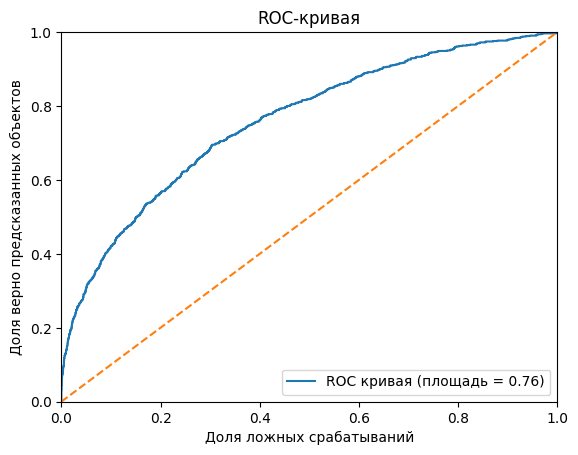

Матрица ошибок:
 [[3139 1323]
 [ 264  556]]


In [66]:
# Создадим модель
model_log = LogisticRegression(    
    random_state=RANDOM_STATE, 
    class_weight='balanced')

# Вычисление метрик с использованием кросс-валидации
scores = cross_validate(model_log, 
                        features_train_code, target_train, 
                        cv=5, scoring=['accuracy','roc_auc'])

roc_auc_log = round(scores['test_roc_auc'].mean(),2)
accuracy_log = round(scores['test_accuracy'].mean(),2)

# Выведем результаты
print('ROC_AUC:', roc_auc_log,'\n')
print('Accuracy:', accuracy_log,'\n')

# Получим вероятностей положительного класса для построения ROC-кривой
proba = cross_val_predict(model_log, 
                          features_train_code, target_train, 
                          cv=5, method='predict_proba')[:, 1]

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(target_train, proba)
plot_roc_curve(roc_auc_log, fpr, tpr)

# Вычисление матрицы ошибок
predicted = (proba > 0.5).astype(int)
conf_matrix_log = confusion_matrix(target_train, predicted)
print('Матрица ошибок:\n', conf_matrix_log)

Полученная точность невелика. ROC_AUC тоже маловата.

По матрице несоответствий видно, что модель допустила 264 случая, когда пользователю бы ничего не предложили и он ушёл (false negative).
и 1323 случая, когда пользователю бы предложили промокоды, но он не собирался уходить (false positive).

Добавим результаты моделирования в датафрейм, чтобы сравнить потом со следующими моделями:

In [67]:
# Создадим пустой DataFrame с фиксированным количеством столбцов
info_about_models = pd.DataFrame(
    columns=['model', 'Parameters', 'ROC_AUC', 'Accuracy', 'Confusion matrix'])

# Добавление нового объекта
new_row_data = ['LogisticRegression','-', roc_auc_log, accuracy_log, conf_matrix_log]
info_about_models.loc[len(info_about_models)] = new_row_data

# Проверяем
info_about_models

,model,Parameters,ROC_AUC,Accuracy,Confusion matrix
0,LogisticRegression,-,0.76,0.7,"[[3139, 1323], [264, 556]]"


#### 5.1 Модель случайного леса

Для данной модели используем выборку со стандартизированными числовыми признаками (StandartScaler) и закодированными категориальными (OneHotEncoder).

Для борьбы с дисбалансом при моделировании будем придавать объектам редкого класса больший вес (взвешивание).

In [68]:
%%time

# Cоздаем словарик, содержащий параметры, которые будем подбирать GridSearch’ем
parametrs_forest = { 'n_estimators': range (1, 100, 10),
              'max_depth': range (1,20,4)}

# Запускаем обучение
grid_forest = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced'), 
    parametrs_forest,
    scoring='roc_auc',
    n_jobs=-1
);
grid_forest.fit(features_train_code, target_train);

# Запомним в отдельные переменные лучшую модель и некоторые параметры
model_forest = grid_forest.best_estimator_
params_forest = grid_forest.best_params_
roc_auc_forest = round(grid_forest.best_score_,2)

print('Лучшее значение ROC_AUC = ',roc_auc_forest,'\n')
print(f' Параметры лучшей модели {params_forest}','\n')

Лучшее значение ROC_AUC =  0.82 

 Параметры лучшей модели {'max_depth': 9, 'n_estimators': 81} 

CPU times: total: 375 ms
Wall time: 7.46 s


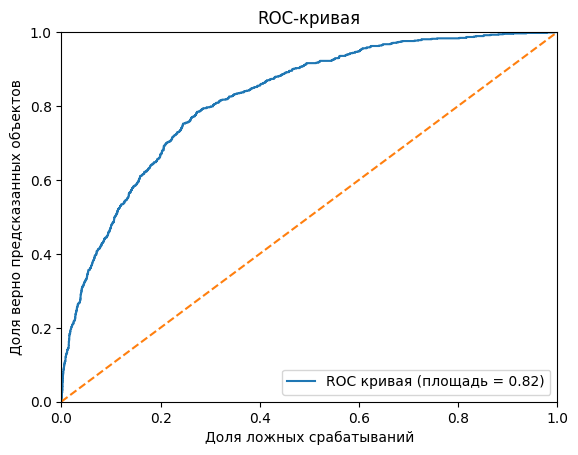

Матрица ошибок:
 [[3794  668]
 [ 340  480]]
Accuracy: 0.81 



In [69]:
# Получим вероятности положительного класса для построения ROC-кривой
proba = cross_val_predict(model_forest, 
                          features_train_code, target_train, 
                          cv=5, method='predict_proba')[:, 1]

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(target_train, proba)
plot_roc_curve(roc_auc_forest, fpr, tpr)

# Вычисление матрицы ошибок
predicted = (proba > 0.5).astype(int)
conf_matrix_forest = confusion_matrix(target_train, predicted)
print('Матрица ошибок:\n', conf_matrix_forest)

# Вычисление accuracy
accuracy_forest = round(accuracy_score(target_train, predicted),2)
print('Accuracy:', accuracy_forest,'\n')

Добавим результаты этой модели в датафрейм для сравнения:

In [70]:
# Добавление нового объекта
new_row_data = ['RandomForestClassifier',params_forest, roc_auc_forest, accuracy_forest, conf_matrix_forest]
info_about_models.loc[len(info_about_models)] = new_row_data

# Проверяем
info_about_models

,model,Parameters,ROC_AUC,Accuracy,Confusion matrix
0,LogisticRegression,-,0.76,0.70,"[[3139, 1323], [264, 556]]"
1,RandomForestClassifier,"{'max_depth': 9, 'n_estimators': 81}",0.82,0.81,"[[3794, 668], [340, 480]]"


Полученная для этой модели точность уже выше. ROC_AUC тоже подросла.

По матрице несоответствий видно, что модель допустила уже чуть больше случаев, когда пользователю бы ничего не предложили и он ушёл (false negative). Но при этом модель допустила примерно вдвое меньше случаев когда пользователю бы предложили промокоды, но он не собирался уходить (false positive). В целом модель случайного леса лучше чем модель логистической регрессии.

#### 5.1 Модель LGBM

Для обучения этой модели у нас отложена обучающая выборка(features_train) без кодирования категориальных признаков и без нормализации числовых (алгоритм LGBM нечуствителен на этот счет):

In [71]:
features_train.head()

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,months_spent_in_company,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
5295,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),37.027454,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Yes
964,No,No,No,Month-to-month,Yes,Mailed check,2.037003,DSL,No,No,No,No,No,No,No
5818,No,No,No,Two year,No,Credit card (automatic),65.019816,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
5189,No,No,No,Month-to-month,No,Electronic check,1.018501,DSL,No,Yes,No,No,No,No,Yes
2302,No,Yes,Yes,Two year,Yes,Mailed check,71.065114,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [72]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 5295 to 4106
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   senior_citizen           5282 non-null   object 
 1   partner                  5282 non-null   object 
 2   dependents               5282 non-null   object 
 3   type                     5282 non-null   object 
 4   paperless_billing        5282 non-null   object 
 5   payment_method           5282 non-null   object 
 6   months_spent_in_company  5282 non-null   float64
 7   internet_service         5282 non-null   object 
 8   online_security          5282 non-null   object 
 9   online_backup            5282 non-null   object 
 10  device_protection        5282 non-null   object 
 11  tech_support             5282 non-null   object 
 12  streaming_tv             5282 non-null   object 
 13  streaming_movies         5282 non-null   object 
 14  multiple_lines       

lgbm не принимает категориальные данных в формате object или str, приведем их к категориальному типу:

In [73]:
# Выделение категориальных признаков
cat_features_lgb = (features_train.select_dtypes(include=[object])).columns.to_list()

# Проверяем
cat_features_lgb

['senior_citizen',
 'partner',
 'dependents',
 'type',
 'paperless_billing',
 'payment_method',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

In [74]:
for feature in cat_features_lgb:
    features_train[feature] = pd.Series(features_train[feature], dtype="category")

# Проверяем
features_train.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 5295 to 4106
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   senior_citizen           5282 non-null   category
 1   partner                  5282 non-null   category
 2   dependents               5282 non-null   category
 3   type                     5282 non-null   category
 4   paperless_billing        5282 non-null   category
 5   payment_method           5282 non-null   category
 6   months_spent_in_company  5282 non-null   float64 
 7   internet_service         5282 non-null   category
 8   online_security          5282 non-null   category
 9   online_backup            5282 non-null   category
 10  device_protection        5282 non-null   category
 11  tech_support             5282 non-null   category
 12  streaming_tv             5282 non-null   category
 13  streaming_movies         5282 non-null   category
 14  multi

Дисбаланс классов мы учтем, используя RepeatedStratifiedKFold:

In [75]:
# # Создание модели
# model_lgbm = LGBMClassifier()

# # Инициализация RepeatedStratifiedKFold
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

# #Получение метрик
# scores_lgbm = cross_validate(model_lgbm, 
#                               features_train, target_train, 
#                               scoring=['roc_auc', 'accuracy'], 
#                               cv=cv, n_jobs=-1)

# accuracy_lgbm = round(mean(scores_lgbm['test_accuracy']), 2)
# roc_auc_lgbm = round(mean(scores_lgbm['test_roc_auc']), 2)
# print('Accuracy:', accuracy_lgbm,'\n')
# print('ROC_AUC:', roc_auc_lgbm,'\n')

In [76]:
# Создание модели
model_lgbm2 = LGBMClassifier(verbose=0)

# Инициализация RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

# Для сбора метрик 
all_roc_auc_lgbm = []
all_accuracy_lgbm = []

# Для общей матрицы ошибок
overall_conf_matrix = None

# Для сбора долей fpr, tpr
all_fpr=[]
all_tpr =[]

# Итерации по фолдам и повторениям
for train_index, test_index in cv.split(features_train, target_train):
    X_train, X_test = features_train.iloc[train_index], features_train.iloc[test_index]
    y_train, y_test = target_train.iloc[train_index], target_train.iloc[test_index]

    # Обучение модели
    model_lgbm2.fit(X_train, y_train)
    
    # Получение вероятностей положительного класса
    predicted_proba  = model_lgbm2.predict_proba(X_test)[:, 1]
    #Получение AUC_ROC
    all_roc_auc_lgbm.append(roc_auc_score(y_test, predicted_proba))

    # Доли для построения ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

    #Получение accuracy
    predicted = (predicted_proba > 0.5).astype(int)
    all_accuracy_lgbm.append(accuracy_score(y_test, predicted))

    # Вычисление матрицы ошибок для текущего разбиения
    conf_matrix = confusion_matrix(y_test, predicted)

    # Обновление общей матрицы ошибок
    if overall_conf_matrix is None:
         overall_conf_matrix = conf_matrix
    else:
         overall_conf_matrix += conf_matrix

# Вывод получившихся метрик
roc_auc_lgbm2 = round(mean(all_roc_auc_lgbm),2)
accuracy_lgbm2 = round(mean(all_accuracy_lgbm),2)
print('ROC_AUC:',roc_auc_lgbm2 ,'\n')
print('Accuracy:',accuracy_lgbm2 ,'\n')

# Вывод общей матрицы ошибок
conf_matrix_lgbm2 = np.ceil(overall_conf_matrix/3)
print('Среднее значение матрицы ошибок:\n',conf_matrix_lgbm2)

#Построение Roc кривых
#for i in range(len(all_fpr)):
#    plot_roc_curve(roc_auc_lgbm, all_fpr[i], all_tpr[i])

ROC_AUC: 0.9 

Accuracy: 0.9 

Среднее значение матрицы ошибок:
 [[4374.   89.]
 [ 420.  400.]]


Добавим результаты моделирования в датафрейм, чтобы сравнить потом с другими моделями:

In [77]:
# Добавление нового объекта
new_row_data = ['LGBMClassifier','-', roc_auc_lgbm2, accuracy_lgbm2, conf_matrix_lgbm2]
info_about_models.loc[len(info_about_models)] = new_row_data

# Проверяем
info_about_models

,model,Parameters,ROC_AUC,Accuracy,Confusion matrix
0,LogisticRegression,-,0.76,0.70,"[[3139, 1323], [264, 556]]"
1,RandomForestClassifier,"{'max_depth': 9, 'n_estimators': 81}",0.82,0.81,"[[3794, 668], [340, 480]]"
2,LGBMClassifier,-,0.90,0.90,"[[4374.0, 89.0], [420.0, 400.0]]"


Метрики модели LGBM лучшие.
Но по матрице несоответствий видим что модель допустила уже больше случаев, когда пользователю бы ничего не предложили и он ушёл (false negative) чем предыдущие модели.
Но в то же время очень сильно уменьшились случаи, когда пользователю бы предложили промокоды, но он не собирался уходить (false positive).

**Подведем итог:**
* Самая лучшие метрики получены для модели LGBM.
* Если сравнивать модели в разрезе матриц несоответсвий, то чем больше правильных предсказаний (TP и TN) и чем меньше ошибочных (FP и FN), тем лучше модель классификации. В результате также лучшей оказывается модель lgbm.

Модель lgbm и будем тестировать.

#### <a id='section_6'></a>
### Шаг 6.Тестирование выбранной модели.

#### 6.1 Тестирование выбранной модели lgbm

Приводим к категориальному типу категориальные признаки тестовой выборки:

In [78]:
for feature in cat_features_lgb:
    features_test[feature] = pd.Series(features_test[feature], dtype="category")

# Проверяем
features_test.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 3286 to 1037
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   senior_citizen           1761 non-null   category
 1   partner                  1761 non-null   category
 2   dependents               1761 non-null   category
 3   type                     1761 non-null   category
 4   paperless_billing        1761 non-null   category
 5   payment_method           1761 non-null   category
 6   months_spent_in_company  1761 non-null   float64 
 7   internet_service         1761 non-null   category
 8   online_security          1761 non-null   category
 9   online_backup            1761 non-null   category
 10  device_protection        1761 non-null   category
 11  tech_support             1761 non-null   category
 12  streaming_tv             1761 non-null   category
 13  streaming_movies         1761 non-null   category
 14  multi

In [79]:
# Получение вероятностей положительного класса
predicted_proba_test2 = model_lgbm2.predict_proba(features_test)[:, 1]
#Получение тестовой ROC_AUC
roc_auc_test2 = round(roc_auc_score(target_test, predicted_proba_test2),2)

print('ROC_AUC на тестовой выборке:',roc_auc_test2 ,'\n')

ROC_AUC на тестовой выборке: 0.89 



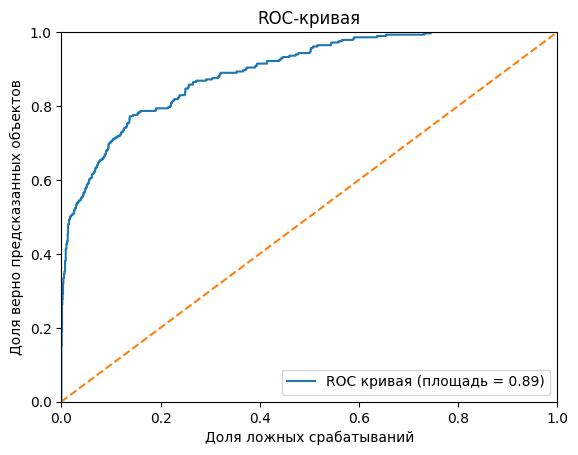

In [80]:
# Доли для построения ROC-кривой
fpr, tpr, _ = roc_curve(target_test, predicted_proba_test2)

#Построение Roc кривой
plot_roc_curve(roc_auc_test2, fpr, tpr)

На тестовой выборке модель показала очень хорошее качество.

#### 6.2 Анализ в разрезе требований бизнеса:

Посмотрим со стороны бизнеса:
Представим, что у нас промокод, который составляет 30% от стоимости ежемесячных услуг для каждого клиента. И представим задачу так: кто собирается уходить, тому выдадим промокод, а кто лояльный, промокод не будем давать. 

В этом случае ошибки первого и второго рода.
1) Ошибки первого рода: предсказание модели 1, а целевое значение 0, получается мы выдали промокод лояльному клиенту.
2) Ошибки второго рода: предсказание модели 0, а целевое значение 1, получается не выдали промокод клиенту, который склонен к оттоку.
    
Чтобы посчитать убытки, рассмотрим такую схему:    
* если клиент на самом деле был лояльный, то мы потеряли 30% от стоимости месячного платежа (ошибка 1го рода)
* если клиент был склонен к оттоку, а мы не дали ему промокод, то мы потеряли 100% от стоимости ежемесячного платежа (ошибка второго рода).    

Рассчитаем убытки по ошибкам первого и второго рода:

In [81]:
#Скидка от ежемесячного платежа
DISCOUNT = 0.3

In [82]:
def losses(true, predicted, monthly_charges):
    """
    Функция для расчета убытков
    На вход принимает целевые значения, значения предсказаний 
    и ежемесячный платеж
    """
    true_copy = true.to_numpy()
    monthly_charges_copy = monthly_charges.to_numpy()

    #ошибка первого рода
    losses_1 = 0;
    #ошибка второго рода
    losses_2 = 0
    
    for i in range (len(predicted)):
        if (predicted[i] == 0 and true_copy[i] == 1):
            losses_2 += monthly_charges_copy[i]
        elif (predicted[i] == 1 and true_copy[i] == 0):
            losses_1 += monthly_charges_copy[i]*DISCOUNT
            
    return losses_1, losses_2 

По умолчанию порог классификации равен 0.5, но посмотрим разные расчеты:

In [83]:
features_test.columns

Index(['senior_citizen', 'partner', 'dependents', 'type', 'paperless_billing',
       'payment_method', 'months_spent_in_company', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

In [84]:
# Перебираемые пороги классификации
thresholds = (0.2,0.3,0.4,0.5,0.6,0.7,0.8)

for threshold in thresholds:
    predicted_test2 = (model_lgbm2.predict_proba(features_test)[:, 1] > threshold).astype(int)
    
    losses_1, losses_2  = losses(target_test, predicted_test2, all_data_copy['monthly_charges'])

    print ('Порог классификации =', threshold)
    print (f'Убытки от выдачи промокодов, когда клиент на самом деле был лояльным = {losses_1:.2f}')
    print (f'Убытки, в случаях когда был склонен к оттоку, и не получил промокод =  {losses_2:.2f}')
    print ('Суммарный убыток =', round((losses_1+losses_2)) ,'\n\n') 

Порог классификации = 0.2
Убытки от выдачи промокодов, когда клиент на самом деле был лояльным = 3479.01
Убытки, в случаях когда был склонен к оттоку, и не получил промокод =  5122.50
Суммарный убыток = 8602 


Порог классификации = 0.3
Убытки от выдачи промокодов, когда клиент на самом деле был лояльным = 1722.47
Убытки, в случаях когда был склонен к оттоку, и не получил промокод =  6960.05
Суммарный убыток = 8683 


Порог классификации = 0.4
Убытки от выдачи промокодов, когда клиент на самом деле был лояльным = 972.84
Убытки, в случаях когда был склонен к оттоку, и не получил промокод =  8713.55
Суммарный убыток = 9686 


Порог классификации = 0.5
Убытки от выдачи промокодов, когда клиент на самом деле был лояльным = 406.73
Убытки, в случаях когда был склонен к оттоку, и не получил промокод =  10103.10
Суммарный убыток = 10510 


Порог классификации = 0.6
Убытки от выдачи промокодов, когда клиент на самом деле был лояльным = 242.29
Убытки, в случаях когда был склонен к оттоку, и не п

Для выбранной модели lgbm оптимальный порог предсказания в районе 0.2-0.3, когда компания будет нести меньше убытков. Величина этого порога нужна, чтобы сделать отбор клиентов для рассылки промокодов.

На основе проведенного в данной работе анализа уже бизнес будет принимать решение когда и кому высылать промокоды.

#### 6.3 Важность признаков при моделировании

Посмотрим какие факторы важны при прогнозировании ухода клиента:

In [85]:
#получим важность признаков
shap_values = shap.TreeExplainer(model_lgbm2).shap_values(features_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


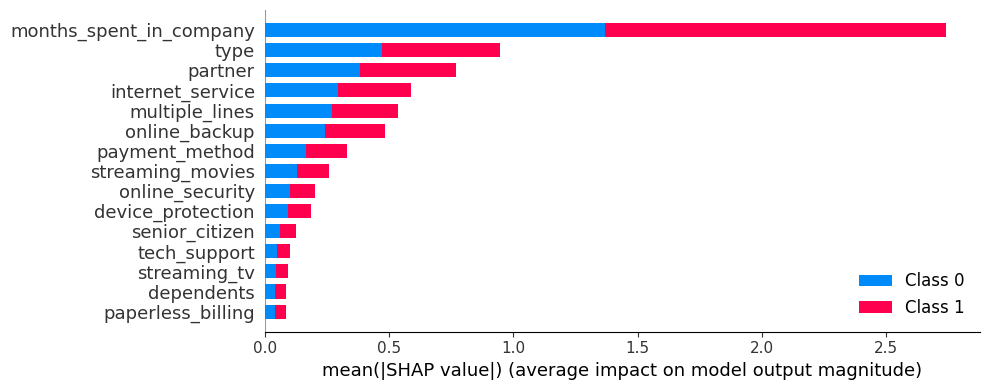

In [86]:
#построим график
shap.summary_plot(
    shap_values, 
    features_train, 
    plot_type="bar",
    plot_size = (10,4))

Наиболее сильное влияние на результаты модели оказывают признаки `months_spent_in_company`, `type`, `monthly_charges` и `partner`.

Самый низкий вклад в прогноз модели вносят признаки `streaming_tv`, `internet_service` и `dependents`.

#### <a id='section_7'></a>
### Шаг 7. Общий вывод и рекомендации заказчику.

#### Цели исследования

Нужно создать модель, которая будет предсказывать, разорвет ли абонент договор.

Декомпозиция:
1) Проанализировать имеющиеся данные и взаимосвязи между ними;
2) Выделить  и обработать необходимые для моделирования признаки;
3) Попробовать несколько моделей бинарной классификации для предсказания разорвёт ли абонент договор и выбрать наилучшую.
4) Передать наилучшую модель и рекомендации заказчику.

Для решения задачи было решено опробовать три модели от самой простой до бустинга: Логистическую регрессию, Случайный лес и LGBM.

В качестве основной метрики решено использовать ROC_AUC, и дополнительно анализировать accuracy.

#### Были проанализированы имеющиеся данные и взаимосвязи между ними:

Изначально были получены данные, собранные командой оператора: персональные данные о некоторых клиентах, информация об их тарифах и услугах.

Во всех датафреймах названия признаков приведены к стилю snake_case.

1)
   - Датафрейм с данными о договорах содержал 7043 объекта.
   - Пропусков и дубликатов в данных нет.
   - Признаки begin_date и end_date были приведены к типу datetime (в признаке end_date для этого у неушедших клиентов значение No было заменено на дату 2020-02-01)
   - Был сгенерирован признак months_spent_in_company, отражающий длительность пребывания клиента в компании (мес)
   - Признак total_charges был приведен к числовому типу float. Некоторые записи в этом признаке были с пробелами (""), эти записи были восстановлены на основании признаков months_spent_in_company и monthly_charges.
   - На основе признака end_date был сгенерирован целевой признак client_loss (0 - клиент остался, 1 - клиент ушел)
2) 
   - Датафрейм с персональной информацией о клиентах содержал 7043 объекта.
   - Пропусков и дубликатов в данных нет.
3) 
   - Датафрейм с описанием интернет-услуг содержал 5517 объектов.
   - Пропусков и дубликатов в данных нет.
4) 
   - Датафрейм с информацей об услугах телефонии содержал 6361 объект.
   - Пропусков и дубликатов в данных нет.
  
**В результате анализа данных и различных графиков было обнаружено следующее:**

* Можно заметить что с каждым годом количество ушедших клиентов увеличивается. Можно также заметить тенденцию за последние три года, что в последние месяцы года клиенты чаще разрывают договор чем в начале года. По приходу клиентов есть пики приходов в начале 2014г и в конце 2019г.
* Средний ежемесячный расход клиентов - 64.76 у.е., но разброс немалый. Медианный ежемесячный расход - 70.35 у.е. Преобладающее количество клиентов компании платит в районе 20-25 у.е. в месяц.
* Заметен всплеск около нуля в кол-ве месяцев пребывания в компании, что говорит о том что многие клиенты не задерживаются надолго в компании.
* Также заметен существенный дисбаланс классов в целевом признаке (84% текущих и 16% ушедших).
* Можно заметить что чаще всего клиенты выбирают ежемесячную оплату (55% клиентов), и реже всего выбирают оплату раз в год.
* Чаще клиенты предпочитают электронный расчетный лист. Касаемо типов платежей немного лидируют электронные чеки. Остальные типы расположились на равных.
* Среди клиентов равное соотношение мужчин и женщин.
* Пенсионеры составляют меньшую часть клиентов (16%).
* Соотношение клиентов в браке(48%) и вне брака(52%) примерно одинаковое.
* Клиентов без детей значительно больше чем семейных (70% против 30%).
* Чуть больше половины клииентов предпочитают оптоволокно (56%) остальные на DSL.
* Большая часть клиентов предпочитает обходится без услуги блокировки опасных сайтов (63% против 37%).
* 56% клиентов ползуются облачным хранилищем файлов для резервного копирования данных, и 56% клиентов пользуются антивирусом.
* Большая часть клиентов не использует выделенную линию технической поддержки.
* Группы клиентов использующих стриминговое телевидение или каталог фильмов и неиспользующих данные опции примерно равны.
* 47% клиентов предпочитают мультилинейное подключение телефона.

После чего данные были объеденены по ключевому признаку customer_id в один датафрейм.
Ввиду того, что датафреймы internet_new и phone_new содержали меньше объектов чем датафреймы с основной информацей personal_new и contract_new, у нас получился датафрейм с пустыми значениями в некоторых признаках.

Пропуски в улсугах телефонии не сопряжены с пропусками в других признаках. А вот пропуски в дополнительных слугах (антивирус, облачное хранилище и пр.) встречаются сразу по всем признакам одновременно. Можно конечно предположить, что в этом случае клинету вовсе ничего не подключено, ни одна из услуг (и заполнить значениями No), либо это сбой при записи/выгрузке данных.
В реальной рабочей ситуации можно было бы привлечь какое-то экспертное мнение для совета, но в текущей ситуации за неимением такого мнения и неимением других идей по восстанавлению пропусков, выбор был остановлен на заполнении заглушками 'unknown'.

**Был проведен анализ групп ушедших и оставшихся клиентов:**

Ушедшие отображены красным цветом, текущие синим:

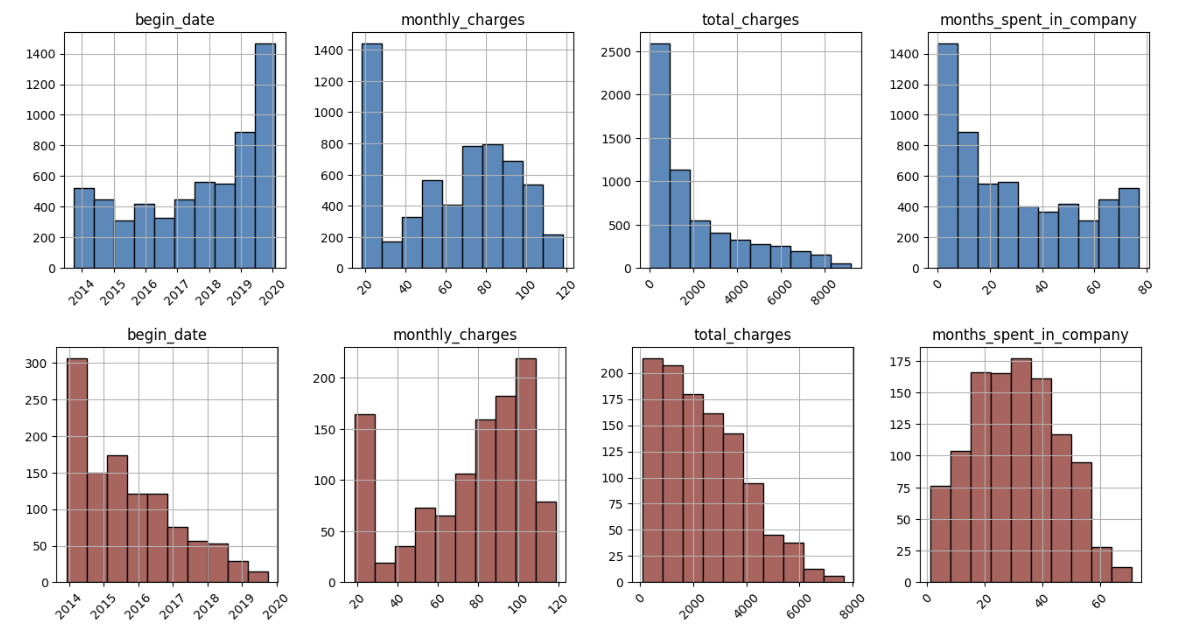

* Среди ушедших больше всего клиентов с датой начала действия договора в 2014-2015г, а среди текущих клиентов больше всего с датой начала действия 2019-2020г. Т.е ушедшие клиенты были давними клиентами.Текущие клиенты в большинстве своем находятся в компании 1-2 года, ушедшие же клиенты в среднем дольше.
* У ушедших клиентов были значительно больше расходы за месяц, и вдобавок они долго были клиентами, таким образом получаем и более высокие общие расходы абонента.
  
Более большие расходы за месяц среди группы ушедших клиентов обусловлены разницей в следующих признаках:

* Ушедшие клиенты чаще текущих предпочитали оптоволокно (63% использующих оптоволокно против 55%).
* Ушедшие активнее использовали услугу стримингового ТВ(62% против 46%) и каталога (64% против 46%).
* Ушедшие клиенты намного чаще текущих использовали услугу облачного хранилища (60% использующих облачное хранилище против 41%).
* У ушедших клиентов чаще чем у текущих была установлена услуга блокировки опасных сайтов (44% против 35%).
* Ушедшие клиенты намного чаще текущих пользовались антивирусом компании (58% использующих антивирус против 41%).
* Ушедшие клиенты чаще использовали выделенную линию технической поддержки (42% против 36%).
* Также ушедшие клиенты сущетсвенно чаще выбирали подключение телефона к нескольким линиям одновременно (68% пользующихся услугой среди ушедших против 43% среди текущих).
  
Дальнейший анализ:

* Ушедшие чуть чаще чем текущие пользовались электронным расчётным листом (65% против 58%)
* Ушелшие значительно чаще выбирали тип оплаты раз в год/два чем текущие клиенты. Текущие клиенты чаще всего предпочитают платить ежемесячно.
* Есть некоторые различия по типу используемых платежей для групп ушедших и оставшихся. В обоих группах лидирует Electronic check, однако дальше в группе ушедших в равных пропорциях предпочитали Bank transfer и  Credit card, а среди текущих на втором месте mailed check.
* Количество мужчин и женщин среди обоих групп почти одинаковое.
* Количество пенсионеров среди ушедших клиентов чуть больше чем среди текущих (21% против 15%).
* Количество клиентов в браке среди ушедших больше на 10% чем среди текущих.
* Кол-во клиентов с детьми почти не изменилось.

Таким образом, заметно, что ушедшие клиенты чаще пользовались подключением по оптоволокну, мультилинейным подключением телефона и охотнее подключали и использовали различные доп.интернет-услуги компании. Расходы за месяц в среднем у ушедших клиентов были выше, и они дольше были клиентами компании.

Конечно вышеприведенный анализ это не 100% утверждения, это гипотезы на основе анализа данных, для которых можно при необходимости использовать методы проверки гипотез. Однако нам пока достаточно данных гипотез.

#### Выделение и обработка важных для моделирования признаков:

* Признаки end_date и begin_date были удалены, так как они сопряжены с определенным временным промежутком, и у нас может возникнуть ошибка в предсказанях модели при использовании более поздних дат. У нас останется достаточно информации в months_spent_in_company и в целевом признаке.

После предыдущих этапов сделано было заключение, что признаки paperless_billing, payment_method и gender потенциально неважные для моделирования, и рассматриваются как кандидаты на удаление из работы.

Была проанализирована Фи-корреляция признаков объединенного датафрейма:

Фи-коррелляцию признаков:

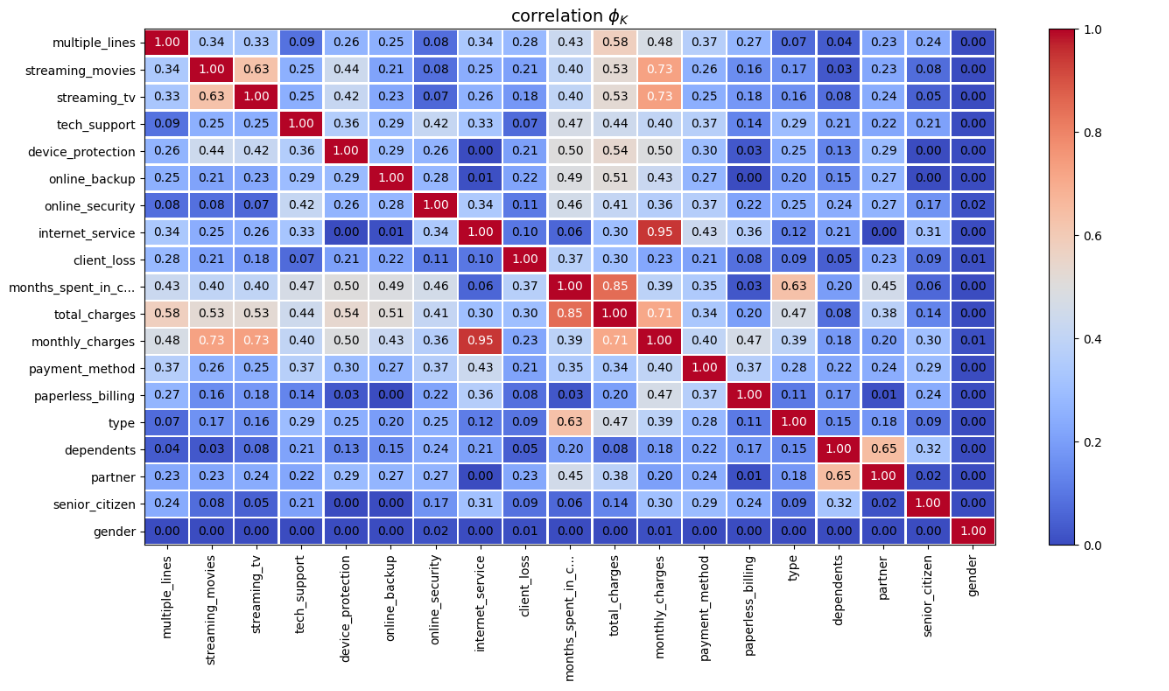

При оценке корреляций рекомендуется оценивать как корреляцию, так и ее значимость: большая корреляция может быть статистически незначительной, и наоборот, малая корреляция может быть очень значимой.

Был построен график матрицы значимостей:

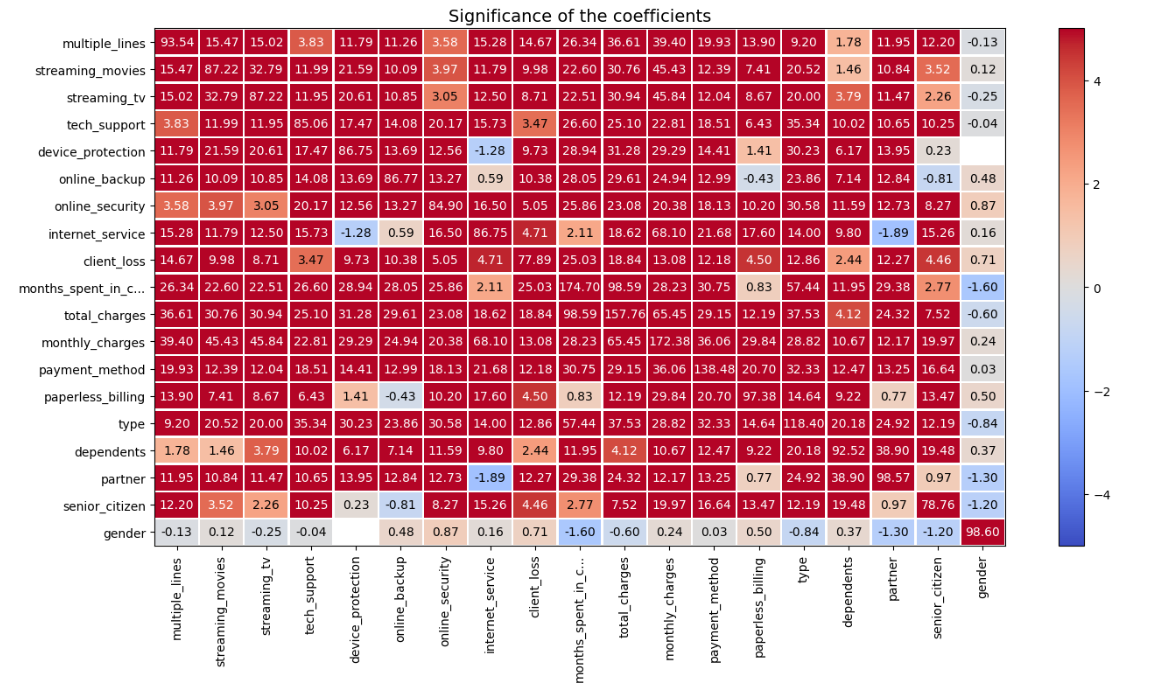

И также классическая корреляция Пирсона для количественных признаков:

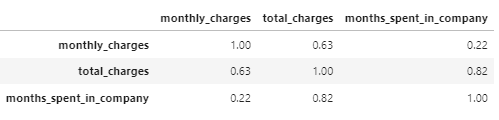

Было выявлено:
* gender имеет почти нулевую корреляцию с целевым признаком, низкую стат.значимость, и этот признак итак у нас был кандидатом на удаление, удалим его.
* partner коррелирует с признаком dependents (0.65), и при этом у dependents очень слабая корреляция с целевым признаком и также существенно ниже стат.значимость.
* monthly_charges сильно коррелирует с streaming_movies (0.73), streaming_tv (0.73) и internet_service (0.95). И при этом корреляция monthly_charges с целевым признаком и ее стат значимость выше чем у перечисленных признаков. 
* monthly_charges также сильно коррелирует с total_charges (0.71), а total_sharges сильно коррелирует с months_spent_in_company(0.85). Учитывая корреляции корреляции данных признаков с целевым их стат значимость и здравый смысл, исключим из моделирования признак total_charges и monthly_charges.
* type статистически значимо коррелирует с признаком months_spent_in_company (0.63).

Бустинги и деревья не чувствительны к мультикорреляции, однако в данной работе будет рассматриваться и модель линейной регрессии, поэтому мультиколлинеарность между количественными признаками нам не нужна.

Корреляцию категориальных признаков пока просто проанализируем и возьмем на заметку, так как она может быть нелинейной и не влиять на линейные модели.

Итого были удалены следующие признаки: gender, monthly_charges и total_charges.

И также был удален признак идентификатора клиента customer_id.

#### Подготовка перед обучением моделей:

* Данные были разделены на обучающую и тестовую выборки (75% к 25%)
* Для подачи в модели Логистической регрессии и Случайного леса проводилась стандартизация числовых признаков (StandardScaler) и кодирование категориальных методом OneHotEncoder.
  
#### Обучение различных моделей и выбор оптимальной для заказчика:

По результатам обучения трех моделей были получены следующие результаты:

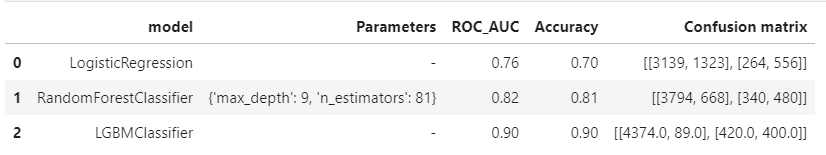

Подробнее об обучении и моделях ниже:

1) Была обучена **модель логистической регрессии (LogisticRegression)**. Для борьбы с дисбалансом при моделировании использовалось взвешивание (назначение большего веса объектам редкого класса). Модель оценивалась с использованием кросс-валидации. Полученная точность невелика. ROC_AUC тоже маловата.
По матрице несоответствий видно, что модель допустила 264 случая, когда пользователю бы ничего не предложили и он ушёл (false negative).
и 1323 случая, когда пользователю бы предложили промокоды, но он не собирался уходить (false positive).

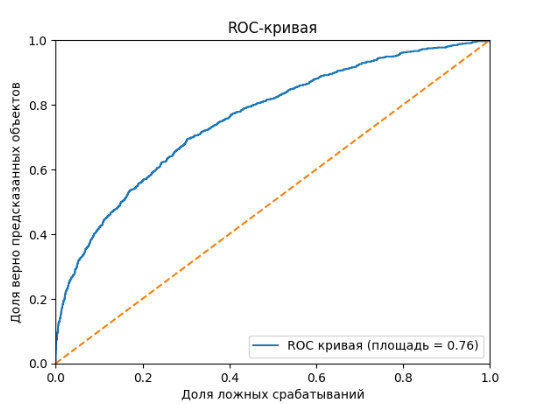

2) Была обучена **модель случайного леса (RandomForestClassifier)**.  Для борьбы с дисбалансом при моделировании аналогично использовалось взвешивание (назначение большего веса объектам редкого класса). Параметры модели (кол-во деревьев и глубина) подбирались с помощью кросс-валидационного метода GridSearchCV. По матрице несоответствий видно, что модель допустила уже чуть больше случаев, когда пользователю бы ничего не предложили и он ушёл (false negative). Но при этом модель допустила примерно вдвое меньше случаев когда пользователю бы предложили промокоды, но он не собирался уходить (false positive). В целом модель случайного леса лучше чем модель логистической регрессии.

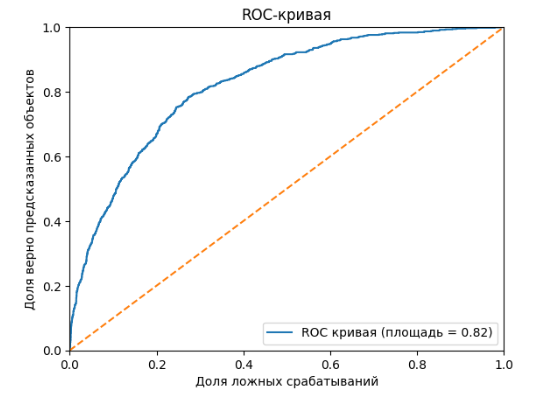
   
3) Была обучена **lgbm модель (LGBMClassifier)**. Дисбаланс классов учитывался использованием RepeatedStratifiedKFold. Метрики у модели LGBM лучшие.
Но по матрице несоответствий видим что модель допустила еще чуть больше случаев, когда пользователю бы ничего не предложили и он ушёл (false negative) чем предыдущие модели.
Но в то же время очень сильно уменьшились случаи, когда пользователю бы предложили промокоды, но он не собирался уходить (false positive).

**Итог обучения:**
* Самая лучшие метрики получены для модели LGBM.
* Если сравнивать модели в разрезе матриц несоответсвий, то чем больше значения TP и TN, тем лучше модель классификации, и чем меньше значения FP и FN, тем лучше модель классификации. В результате также лучшей оказывается модель lgbm.

Модель lgbm и решено тестировать.


#### Тестирование модели и анализ важности используемых признаков:

**При тестировании модель показала хорошее качество ROC_AUC = 0.89.**

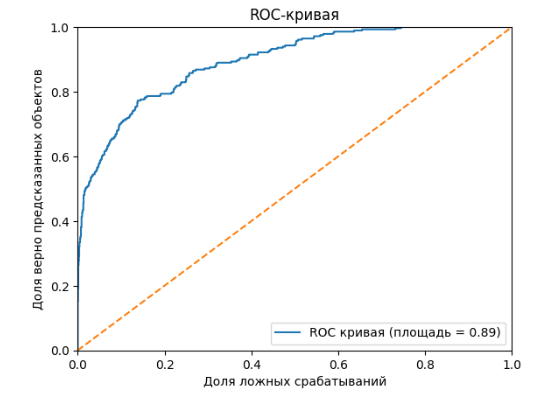

**Был проведен анализ в разрезе требований бизнеса**, и получено что для выбранной модели lgbm оптимальный порог предсказания в районе 0.2-0.3, тогда компания будет нести меньше убытков. Величина этого порога нужна, чтобы сделать отбор клиентов для рассылки промокодов.

На основе проведенного в данной работе анализа уже бизнес будет принимать решение когда и кому высылать промокоды.

**Была проанализирована важность признаков** при прогнозировании ухода клиента:

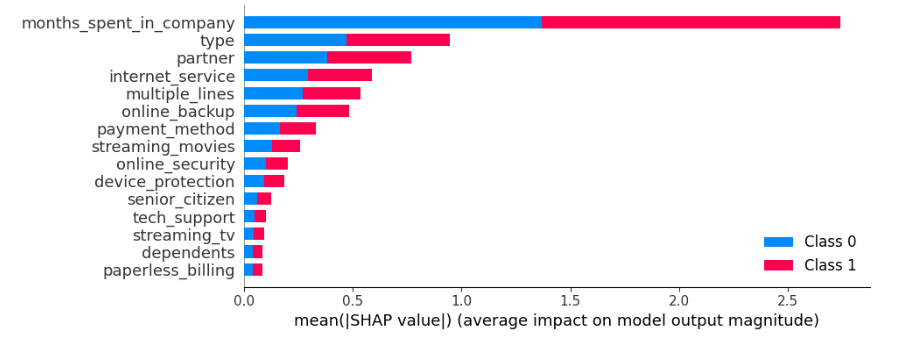

Наиболее сильное влияние на результаты модели оказывают признаки `months_spent_in_company`, `type`, `monthly_charges` и `partner`.

Самый низкий вклад в прогноз модели вносят признаки `streaming_tv`, `internet_service` и `dependents`.

**Возможные пути для улучшения решения поставленной задачи:**
1) Можно попробовать "поиграть" с различными параметрами lgbm модели.
2) Можно попробовать удалить маловажные по shap анализу признаки.
3) Можно попровать добавить новый признак - количество подключенных дополнительных услуг (облачное хранилище, блокировка сайтов и др).

### Рекомендации:

По итогу работы можно рекомендовать обученную в ходе данной работы модель lgbm, учитывающую вышеприведенные признаки для предсказания оттока клиентов.

Мы надеемся, что данная модель поможет уменьшить отток клиентов, и готовы провести дополнительное исследование, если текущий результат недостаточен.

Исходя из проведенного анализа стоит обратить внимание на следующих клиентов:

- клиенты, которые очень давно в компании, особенно те, которые начинали сотрудничать еще в 2014-2015г;
- клиенты у которых тип оплаты раз в год/два;
- клиенты с ежемесячным платежом выше среднего;
- клиенты состоящие в браке;
- клиенты использующие подключение по оптоволокну.

Вышеприведенные клиенты уходят чаще. Возможно нужно повысить качество предоставляемых им услуг.

Также была замечена тенденция, что в последние месяцы года клиенты чаще разрывают договор чем в начале года. Стоит выдавать купоны ориентировочно в ноябре.